<a href="https://colab.research.google.com/github/BillBs-13/AppML/blob/main/Machine_Leqrning_Assessement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA


Training shape: (175341, 45)
Testing shape: (82332, 45)

Columns: Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


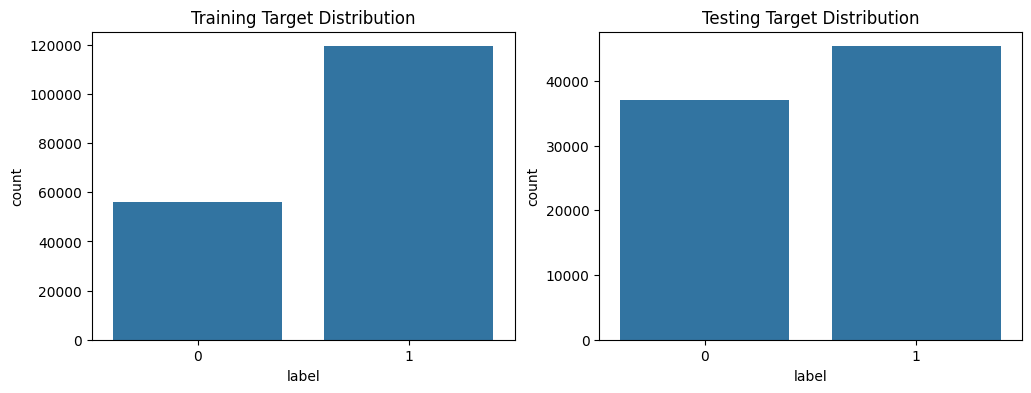


--- Summary Stats by Target ---
                  id       dur      spkts      dpkts        sbytes  \
label                                                                
0       33939.199286  1.017177  30.725482  38.057696   4105.702929   
1      112884.303391  1.519969  15.405946  10.012619  11068.655357   

             dbytes           rate        sttl       dttl         sload  ...  \
label                                                                    ...   
0      31049.463143   13799.312118   75.445982  64.276304  2.317070e+07  ...   
1       7364.456256  133699.690589  228.395732  86.804602  9.704916e+07  ...   

       ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
label                                                                   
0        3.491571          1.793804          1.190304        3.870000   
1        7.462004          7.067998          5.621471       11.010348   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_ds

/tmp/ipython-input-368341108.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corrs.values, y=corrs.index, palette="coolwarm")


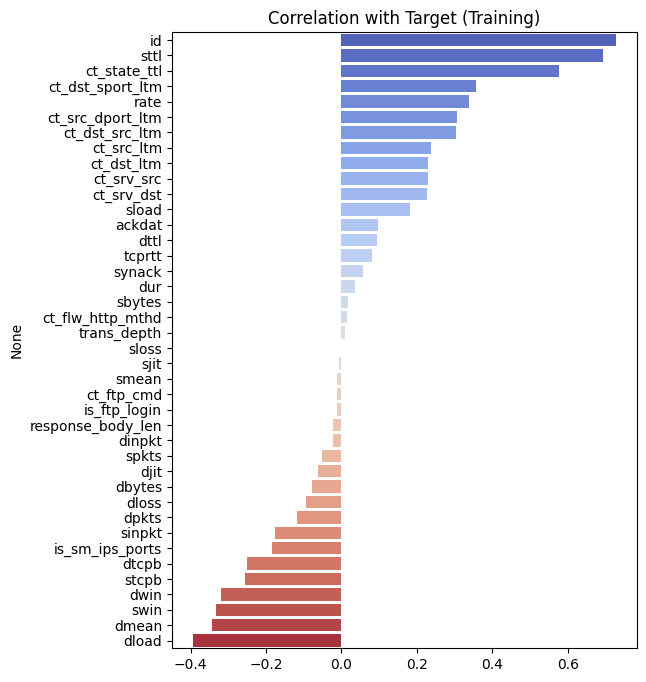

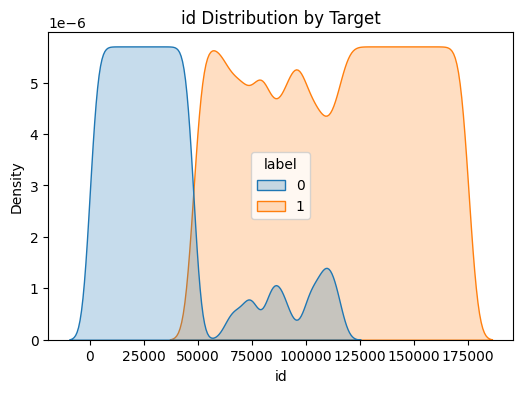

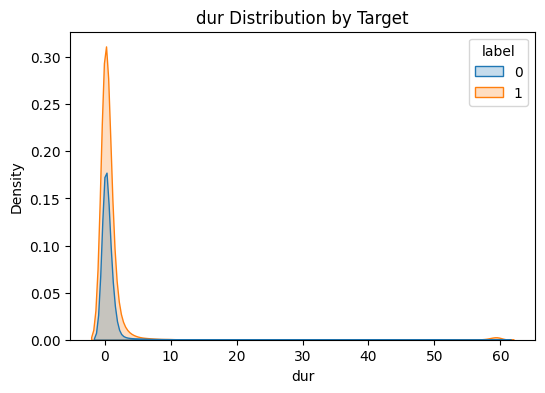

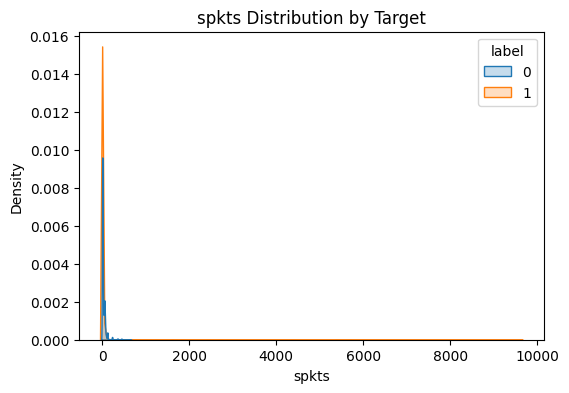

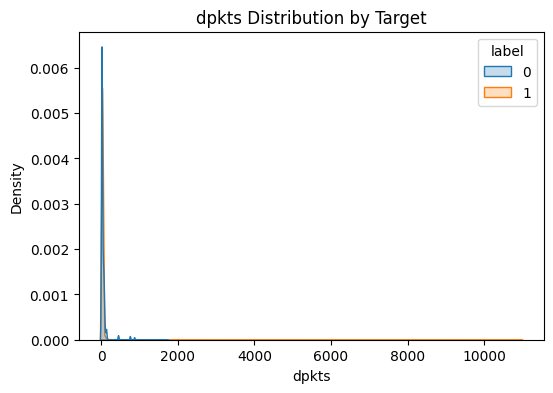

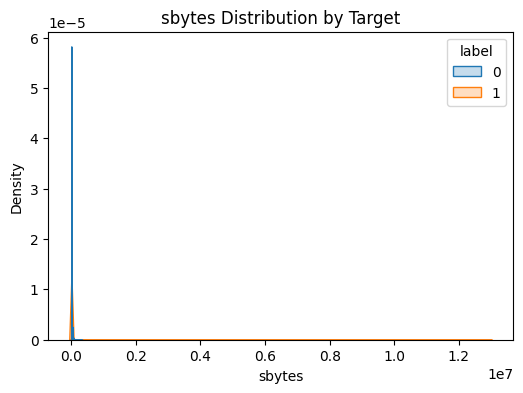

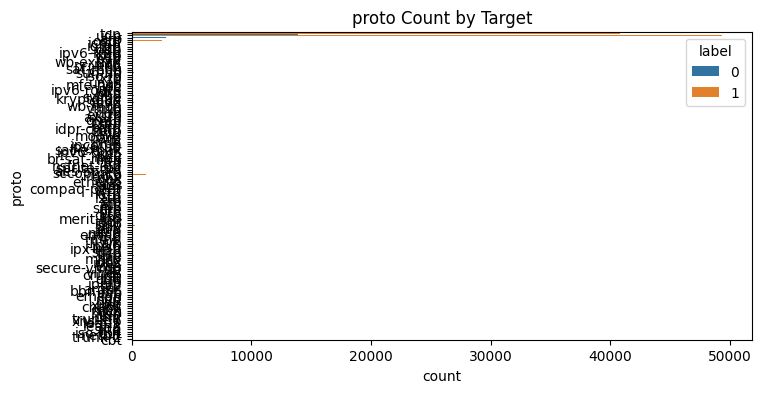

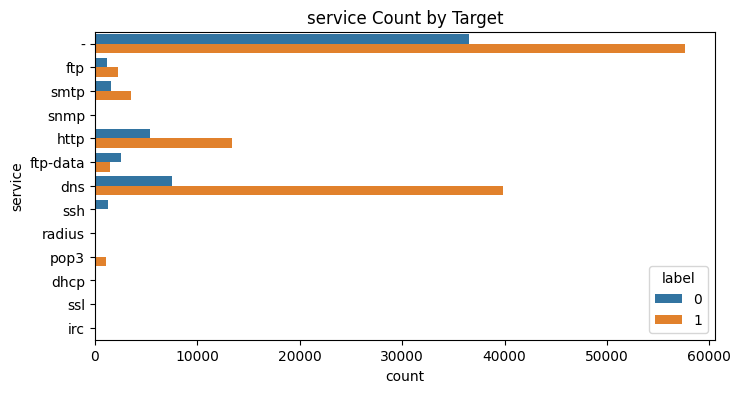

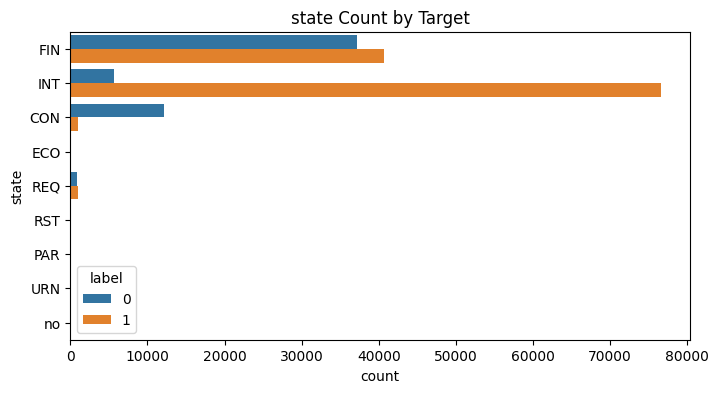

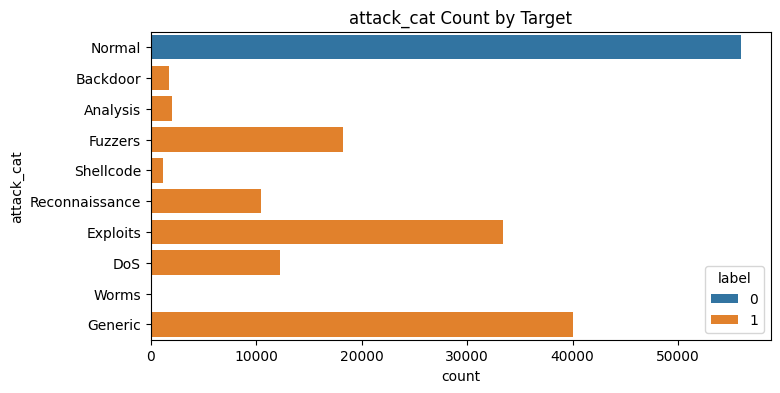


Missing values in train:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
train = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

# --- Inspect structure ---
print("Training shape:", train.shape)
print("Testing shape:", test.shape)
print("\nColumns:", train.columns)

# --- Focus on binary target column ---
# According to UNSW-NB15 dataset: "label" is binary (0=Normal, 1=Attack)
target_col = "label"

# --- Target distribution ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=target_col, data=train, ax=ax[0])
ax[0].set_title("Training Target Distribution")

sns.countplot(x=target_col, data=test, ax=ax[1])
ax[1].set_title("Testing Target Distribution")
plt.show()

# --- Basic statistics by target ---
print("\n--- Summary Stats by Target ---")
print(train.groupby(target_col).mean(numeric_only=True))

# --- Correlation with target (numerical features only) ---
numeric_cols = train.select_dtypes(include=[np.number]).columns.drop(target_col)
corrs = train[numeric_cols].corrwith(train[target_col])
corrs = corrs.sort_values(ascending=False)

plt.figure(figsize=(6, 8))
sns.barplot(x=corrs.values, y=corrs.index, palette="coolwarm")
plt.title("Correlation with Target (Training)")
plt.show()

# --- Distribution of numerical features by target ---
sample_numeric = numeric_cols[:5]  # pick top 5 for visualization
for col in sample_numeric:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=train, x=col, hue=target_col, fill=True)
    plt.title(f"{col} Distribution by Target")
    plt.show()

# --- Categorical features (if any) ---
categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, hue=target_col, data=train)
    plt.title(f"{col} Count by Target")
    plt.show()

# --- Missing values ---
print("\nMissing values in train:")
print(train.isnull().sum())


Logistic Regression


=== Logistic Regression (No Scaling + L2) ===

No Scaling + L2 | k=5
Selected Features: ['rate', 'sload', 'dload', 'stcpb', 'dtcpb']
Accuracy: 0.6911, Precision: 0.6479, Recall: 0.9615, F1: 0.7741, AUC: 0.8133, Time: 1.68s

No Scaling + L2 | k=10
Selected Features: ['sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sinpkt', 'djit', 'stcpb', 'dtcpb', 'response_body_len']
Accuracy: 0.7068, Precision: 0.6613, Recall: 0.9582, F1: 0.7825, AUC: 0.8168, Time: 1.76s

No Scaling + L2 | k=15
Selected Features: ['sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.7076, Precision: 0.6614, Recall: 0.9610, F1: 0.7835, AUC: 0.8156, Time: 2.11s

No Scaling + L2 | k=20
Selected Features: ['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.7076, Precision: 

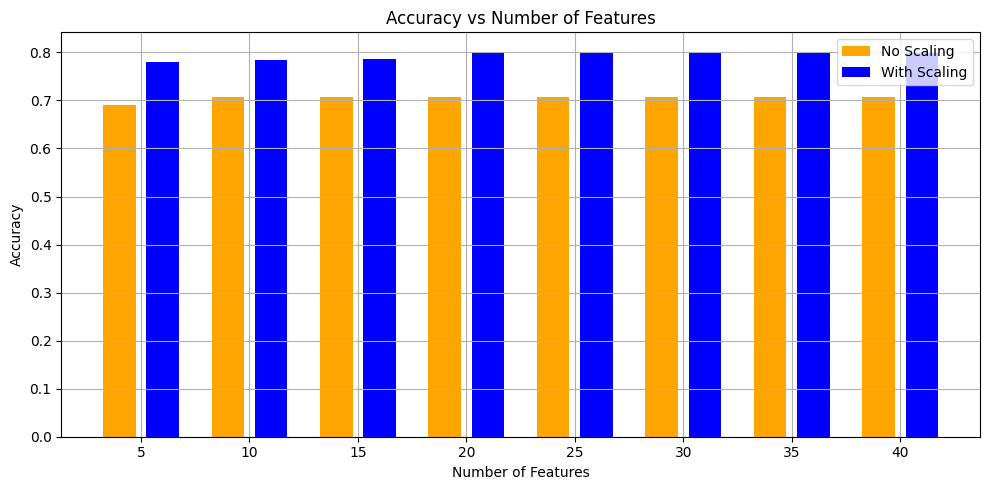

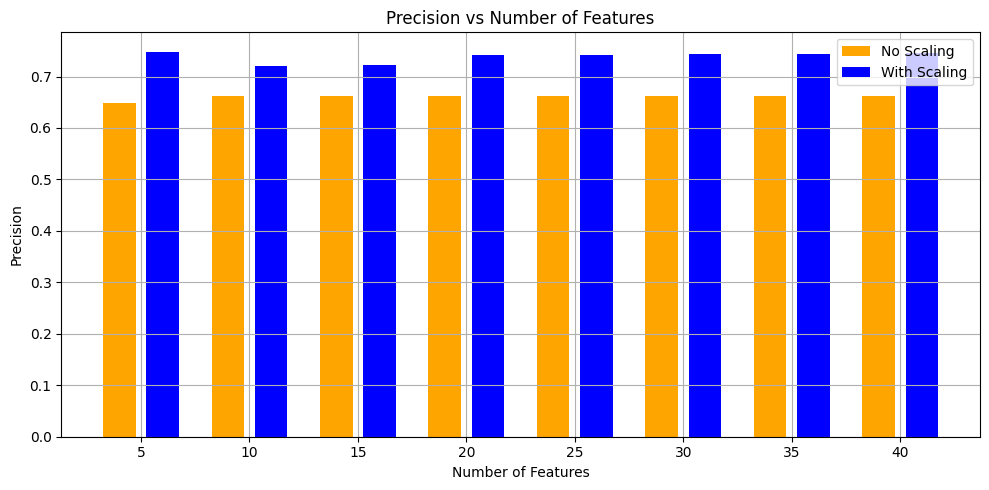

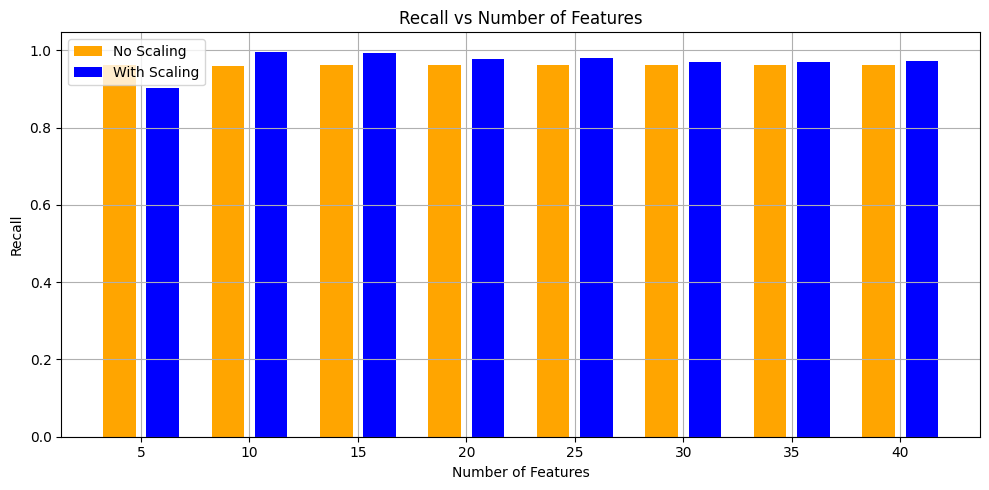

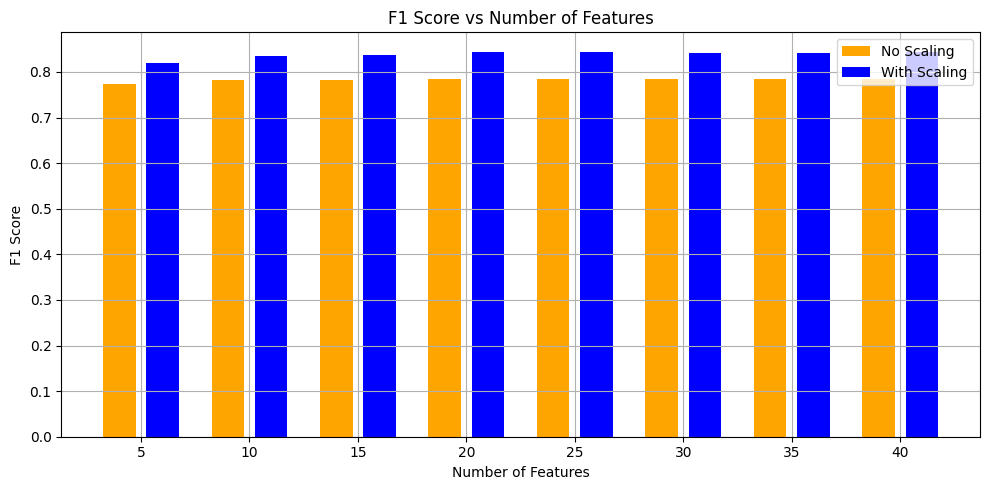

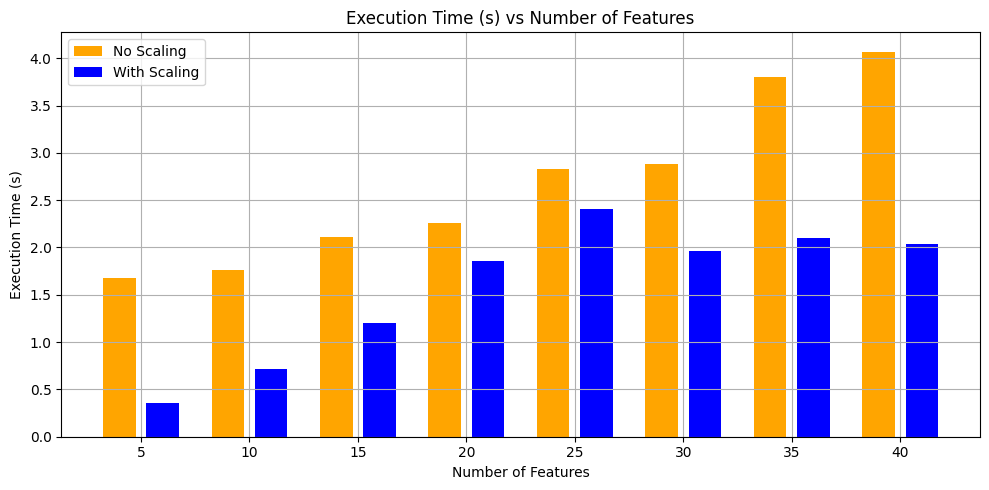

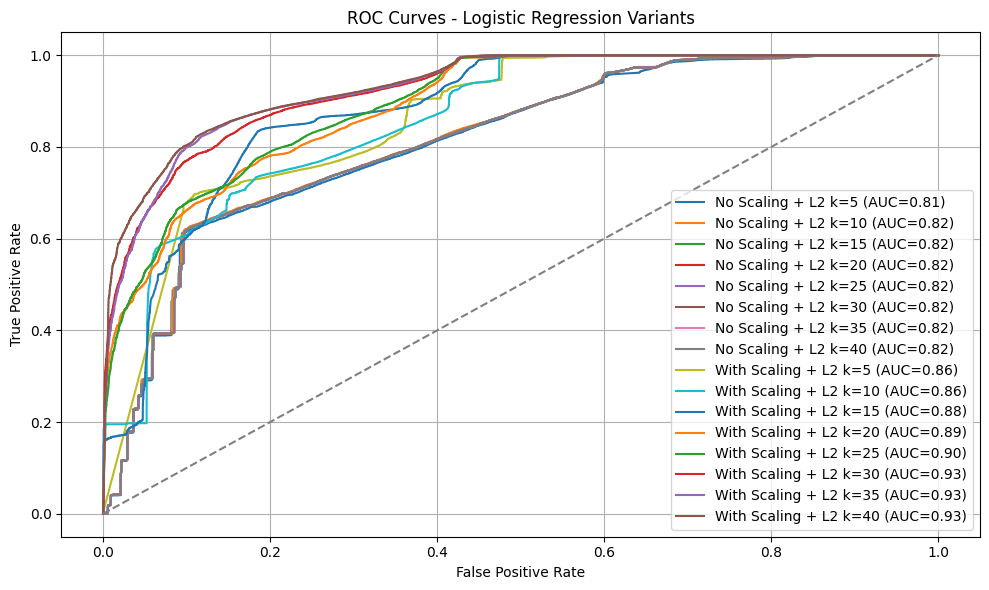

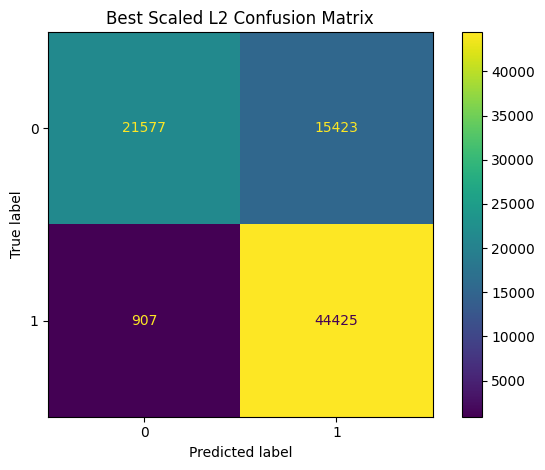

['/content/best_logreg_unsw_model_scaled_l2.pkl']

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve
)

# -------------------------------
# Load and Preprocess UNSW Dataset
# -------------------------------
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    all_vals = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(all_vals)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_ns = train_df.drop(columns=['label'])
y_train_ns = train_df['label']
X_test_ns = test_df.drop(columns=['label'])
y_test_ns = test_df['label']

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train_ns)
X_test_s = scaler.transform(X_test_ns)
y_train_s = y_train_ns
y_test_s = y_test_ns

# -------------------------------
# Evaluation Function
# -------------------------------
def evaluate(X_train, X_test, y_train, y_test, label):
    results = []
    step = 5
    k_vals = list(range(5, X_train_ns.shape[1] + 1, step))
    for k in k_vals:
        selector = SelectKBest(score_func=chi2, k=k)
        X_train_sel = selector.fit_transform(X_train, y_train)
        X_test_sel = selector.transform(X_test)
        features = [X_train_ns.columns[i] for i in selector.get_support(indices=True)]

        model = LogisticRegression(max_iter=2000, solver='liblinear', penalty='l2')
        start_time = time.time()
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        y_prob = model.predict_proba(X_test_sel)[:, 1]
        elapsed_time = time.time() - start_time

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        print(f"\n{label} | k={k}\nSelected Features: {features}\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}, Time: {elapsed_time:.2f}s")

        results.append({
            'k': k,
            'features': features,
            'acc': acc,
            'prec': prec,
            'rec': rec,
            'f1': f1,
            'roc_auc': roc_auc,
            'time': elapsed_time,
            'model': model,
            'conf_matrix': confusion_matrix(y_test, y_pred),
            'fpr': fpr,
            'tpr': tpr,
            'label': label
        })

    return results

# -------------------------------
# Run Evaluation
# -------------------------------
print("=== Logistic Regression (No Scaling + L2) ===")
results_ns = evaluate(X_train_ns, X_test_ns, y_train_ns, y_test_ns, "No Scaling + L2")

print("\n=== Logistic Regression (With Scaling + L2) ===")
results_s = evaluate(X_train_s, X_test_s, y_train_s, y_test_s, "With Scaling + L2")

# -------------------------------
# Plot Metrics
# -------------------------------
def plot_metric(metric, ylabel):
    k_vals = [r['k'] for r in results_ns]
    plt.figure(figsize=(10, 5))
    plt.bar([k - 1 for k in k_vals], [r[metric] for r in results_ns], width=1.5, label='No Scaling', color='orange')
    plt.bar([k + 1 for k in k_vals], [r[metric] for r in results_s], width=1.5, label='With Scaling', color='blue')
    plt.xlabel('Number of Features')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Number of Features')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_metric('acc', 'Accuracy')
plot_metric('prec', 'Precision')
plot_metric('rec', 'Recall')
plot_metric('f1', 'F1 Score')
plot_metric('time', 'Execution Time (s)')

# -------------------------------
# ROC Curve Plot
# -------------------------------
def plot_roc_curves(results, title):
    plt.figure(figsize=(10, 6))
    for r in results:
        plt.plot(r['fpr'], r['tpr'], label=f"{r['label']} k={r['k']} (AUC={r['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves(results_ns + results_s, "ROC Curves - Logistic Regression Variants")

# -------------------------------
# Confusion Matrix Example (Best Scaled Model)
# -------------------------------
best_result_s = max(results_s, key=lambda r: r['f1'])
ConfusionMatrixDisplay(confusion_matrix=best_result_s['conf_matrix']).plot()
plt.title('Best Scaled L2 Confusion Matrix')
plt.grid(False)
plt.tight_layout()
plt.show()

# -------------------------------
# Save Best Model
# -------------------------------
joblib.dump(best_result_s['model'], '/content/best_logreg_unsw_model_scaled_l2.pkl')


Decision Tree

=== Decision Tree (No Scaling) ===

DT No Scaling | k=5
Selected Features: ['rate', 'sload', 'dload', 'stcpb', 'dtcpb']
Accuracy: 0.8413, Precision: 0.8063, Recall: 0.9370, F1: 0.8667, AUC: 0.8434, Time: 1.45s

DT No Scaling | k=10
Selected Features: ['sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sinpkt', 'djit', 'stcpb', 'dtcpb', 'response_body_len']
Accuracy: 0.8644, Precision: 0.8266, Recall: 0.9538, F1: 0.8856, AUC: 0.8687, Time: 2.69s

DT No Scaling | k=15
Selected Features: ['sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.8681, Precision: 0.8303, Recall: 0.9557, F1: 0.8886, AUC: 0.8740, Time: 1.87s

DT No Scaling | k=20
Selected Features: ['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.8689, Precision: 0.8306, Recall: 0.9

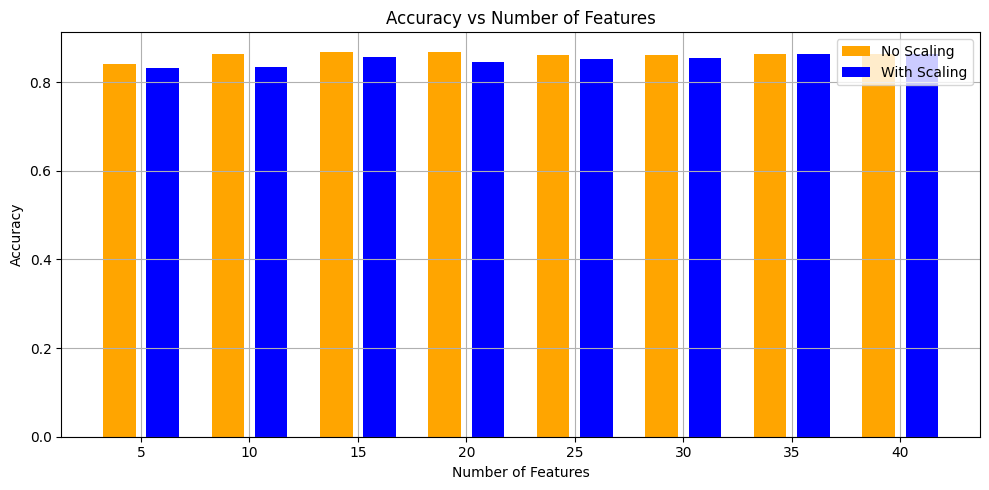

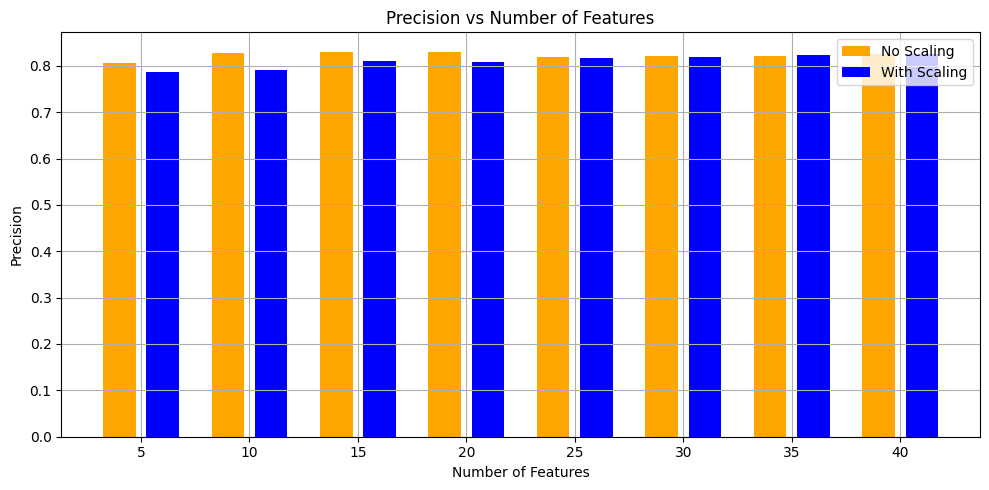

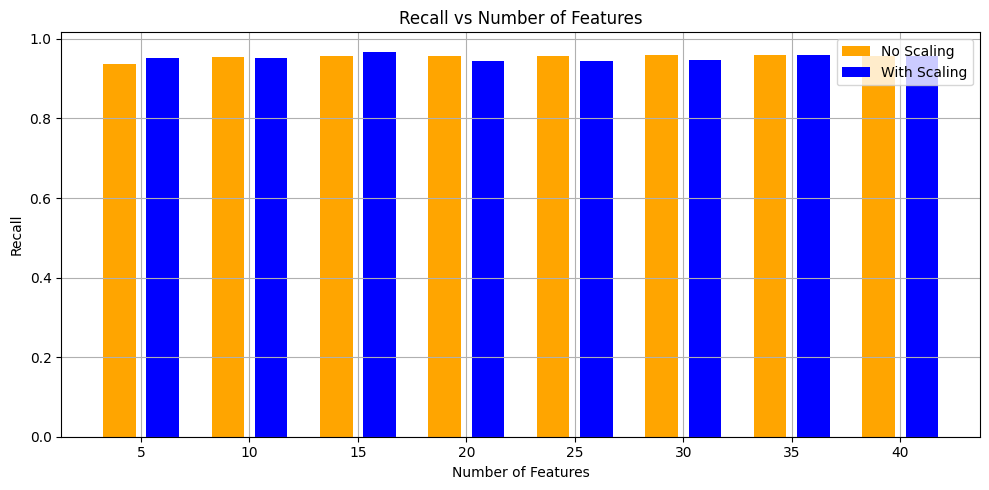

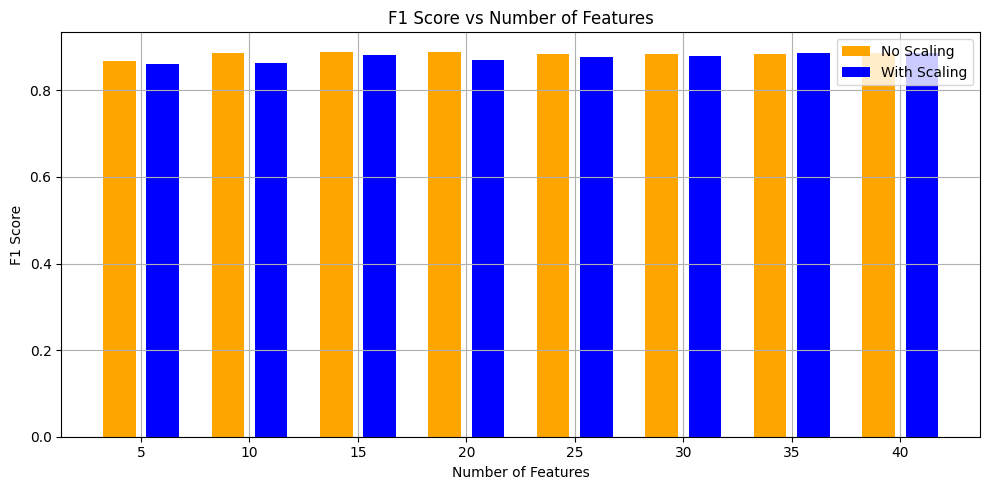

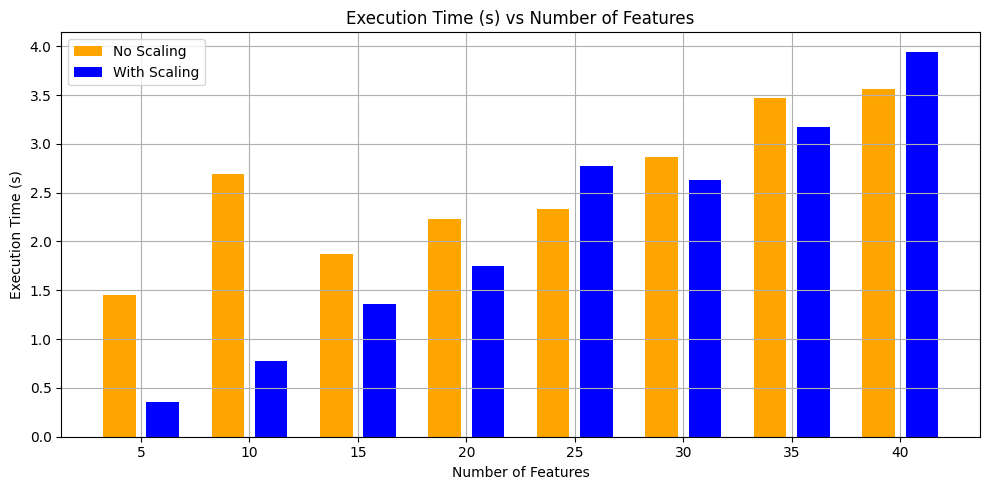

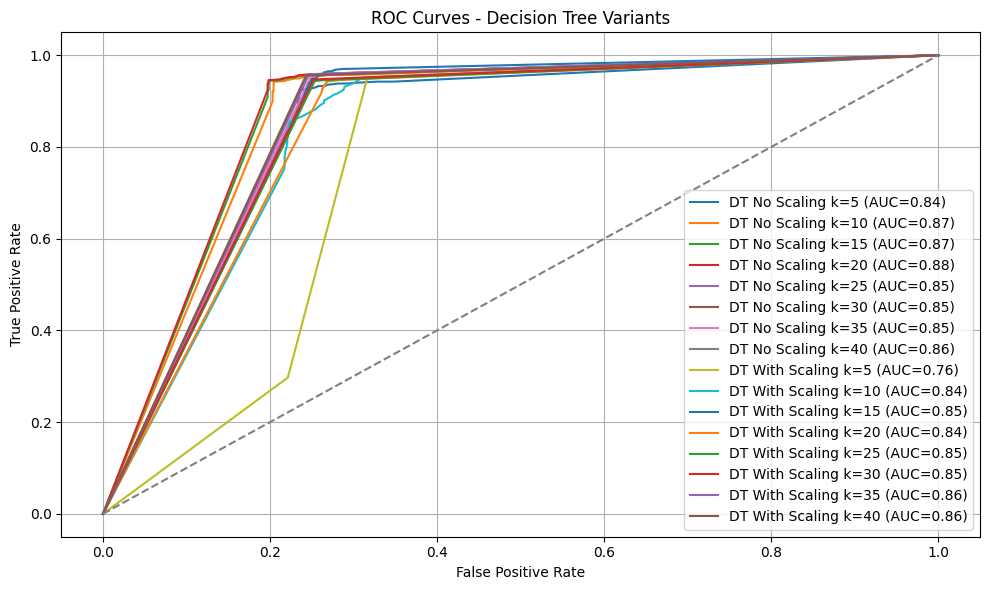

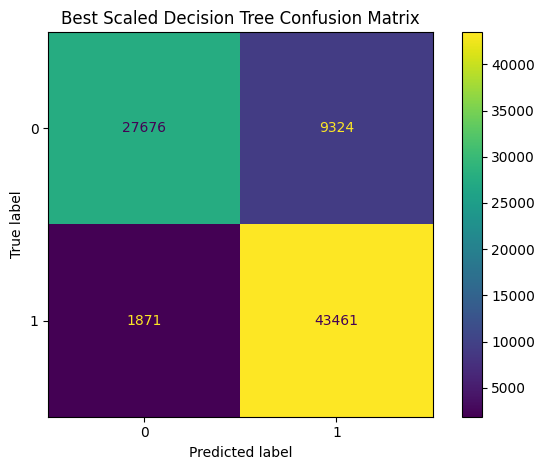

['/content/best_dt_unsw_model_scaled.pkl']

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve
)

# Load and preprocess the UNSW dataset
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')
train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    all_vals = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(all_vals)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_ns = train_df.drop(columns=['label'])
y_train_ns = train_df['label']
X_test_ns = test_df.drop(columns=['label'])
y_test_ns = test_df['label']

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train_ns)
X_test_s = scaler.transform(X_test_ns)
y_train_s = y_train_ns
y_test_s = y_test_ns

# Evaluation function for decision tree
def evaluate_dt(X_train, X_test, y_train, y_test, label):
    results = []
    step = 5
    k_vals = list(range(5, X_train_ns.shape[1] + 1, step))
    for k in k_vals:
        selector = SelectKBest(score_func=chi2, k=k)
        X_train_sel = selector.fit_transform(X_train, y_train)
        X_test_sel = selector.transform(X_test)
        features = [X_train_ns.columns[i] for i in selector.get_support(indices=True)]

        model = DecisionTreeClassifier(random_state=42)
        start_time = time.time()
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        y_prob = model.predict_proba(X_test_sel)[:, 1]
        elapsed_time = time.time() - start_time

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        print(f"\n{label} | k={k}\nSelected Features: {features}\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}, Time: {elapsed_time:.2f}s")

        results.append({
            'k': k,
            'features': features,
            'acc': acc,
            'prec': prec,
            'rec': rec,
            'f1': f1,
            'roc_auc': roc_auc,
            'time': elapsed_time,
            'model': model,
            'conf_matrix': confusion_matrix(y_test, y_pred),
            'fpr': fpr,
            'tpr': tpr,
            'label': label
        })

    return results

# Run evaluation
print("=== Decision Tree (No Scaling) ===")
results_dt_ns = evaluate_dt(X_train_ns, X_test_ns, y_train_ns, y_test_ns, "DT No Scaling")

print("\n=== Decision Tree (With Scaling) ===")
results_dt_s = evaluate_dt(X_train_s, X_test_s, y_train_s, y_test_s, "DT With Scaling")

# Plot metrics

def plot_metric(metric, ylabel):
    k_vals = [r['k'] for r in results_dt_ns]
    plt.figure(figsize=(10, 5))
    plt.bar([k - 1 for k in k_vals], [r[metric] for r in results_dt_ns], width=1.5, label='No Scaling', color='orange')
    plt.bar([k + 1 for k in k_vals], [r[metric] for r in results_dt_s], width=1.5, label='With Scaling', color='blue')
    plt.xlabel('Number of Features')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Number of Features')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_metric('acc', 'Accuracy')
plot_metric('prec', 'Precision')
plot_metric('rec', 'Recall')
plot_metric('f1', 'F1 Score')
plot_metric('time', 'Execution Time (s)')

# ROC Curves

def plot_roc_curves(results, title):
    plt.figure(figsize=(10, 6))
    for r in results:
        plt.plot(r['fpr'], r['tpr'], label=f"{r['label']} k={r['k']} (AUC={r['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves(results_dt_ns + results_dt_s, "ROC Curves - Decision Tree Variants")

# Confusion matrix for best scaled result
best_dt_scaled = max(results_dt_s, key=lambda r: r['f1'])
ConfusionMatrixDisplay(confusion_matrix=best_dt_scaled['conf_matrix']).plot()
plt.title('Best Scaled Decision Tree Confusion Matrix')
plt.grid(False)
plt.tight_layout()
plt.show()

# Save best model
joblib.dump(best_dt_scaled['model'], '/content/best_dt_unsw_model_scaled.pkl')


Random Forest

=== Random Forest (No Scaling) ===

RF No Scaling | k=5
Selected Features: ['rate', 'sload', 'dload', 'stcpb', 'dtcpb']
Accuracy: 0.8366, Precision: 0.7857, Recall: 0.9669, F1: 0.8670, AUC: 0.9564, Time: 36.97s

RF No Scaling | k=10
Selected Features: ['sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sinpkt', 'djit', 'stcpb', 'dtcpb', 'response_body_len']
Accuracy: 0.8643, Precision: 0.8163, Recall: 0.9723, F1: 0.8875, AUC: 0.9707, Time: 38.98s

RF No Scaling | k=15
Selected Features: ['sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.8654, Precision: 0.8170, Recall: 0.9737, F1: 0.8885, AUC: 0.9731, Time: 28.56s

RF No Scaling | k=20
Selected Features: ['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.8668, Precision: 0.8187, Recall: 

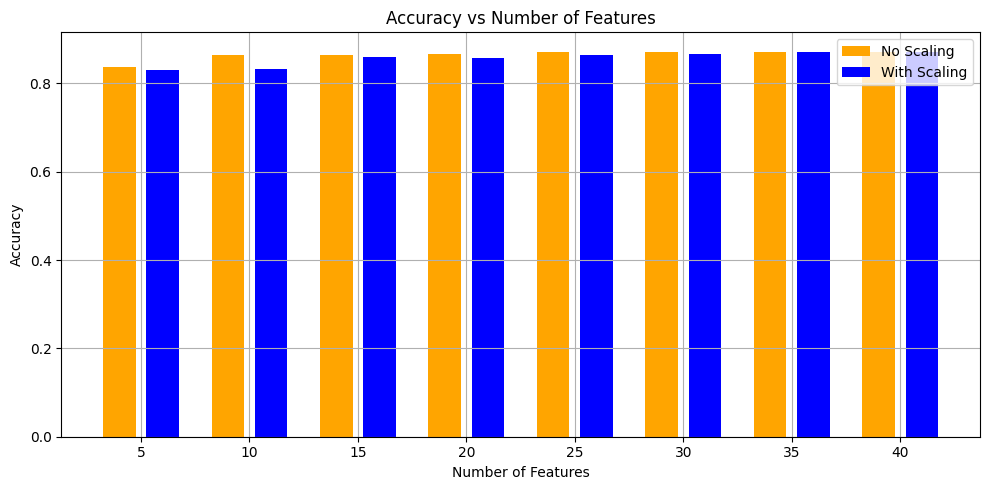

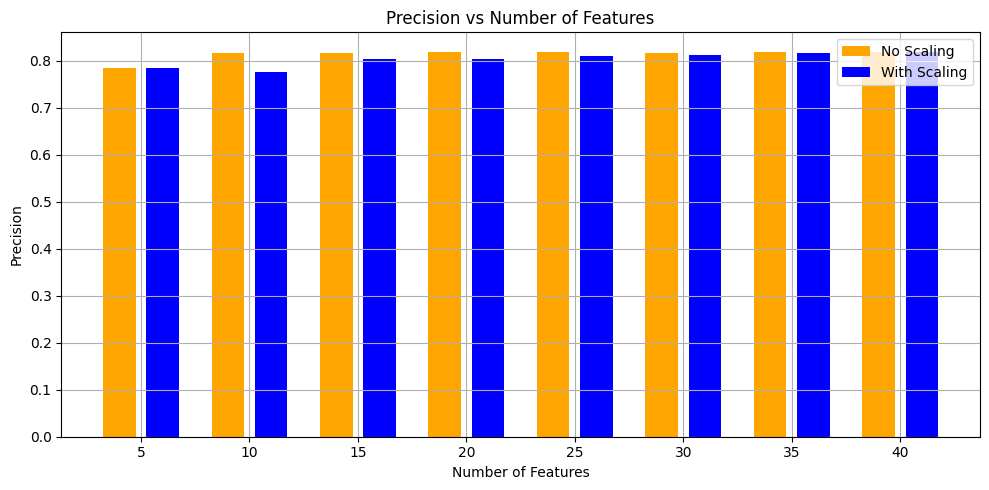

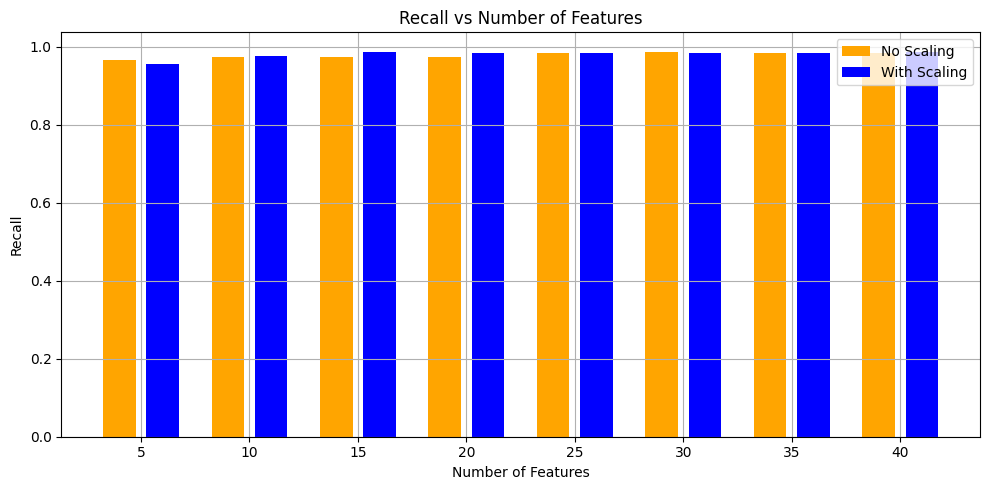

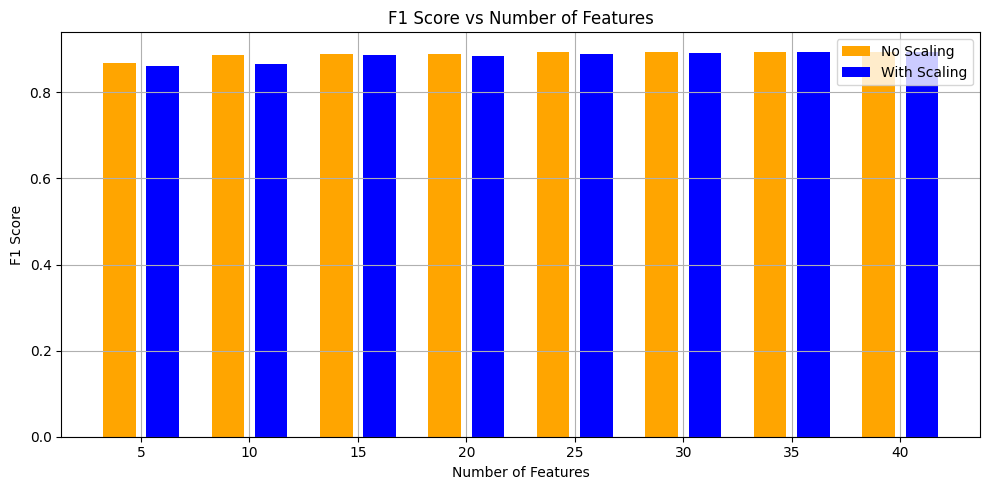

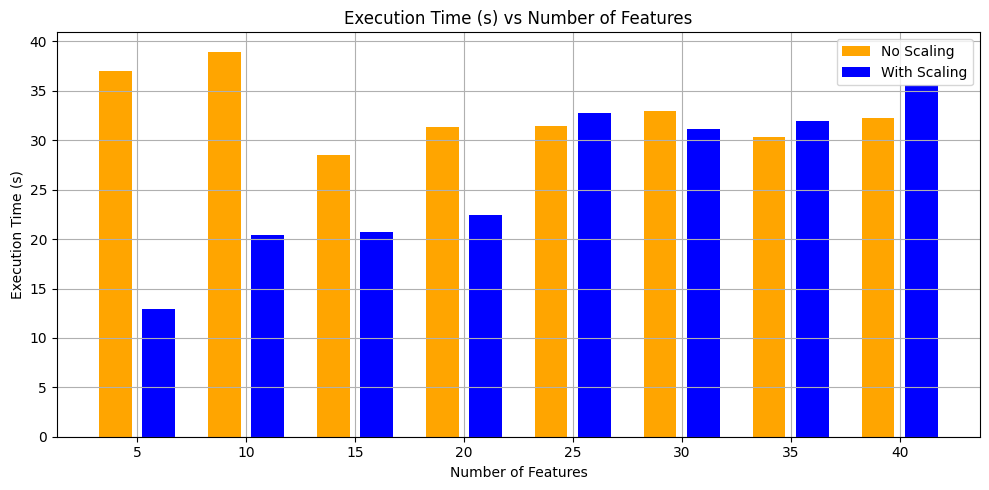

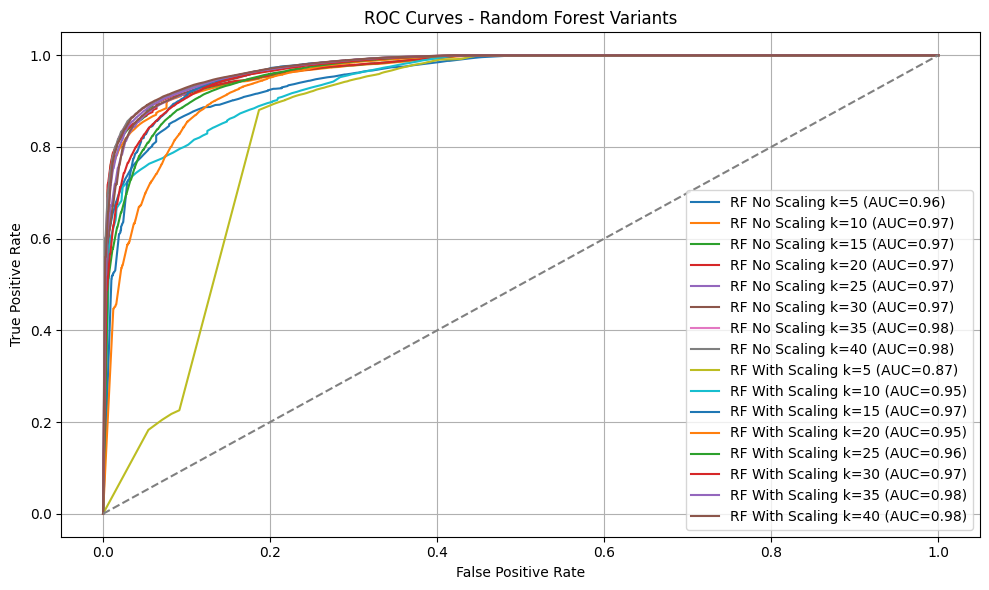

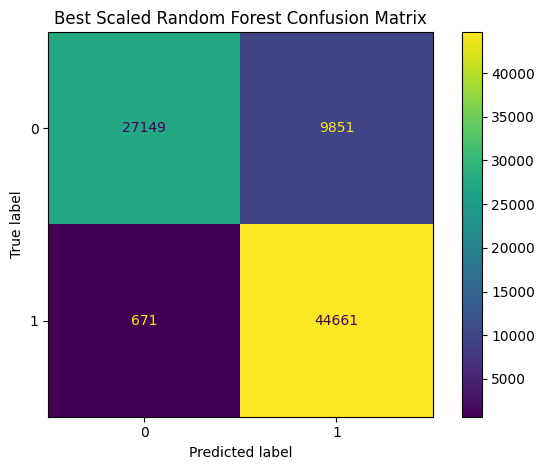

['/content/best_rf_unsw_model_scaled.pkl']

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve
)

# Load and preprocess the UNSW dataset
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')
train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    all_vals = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(all_vals)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_ns = train_df.drop(columns=['label'])
y_train_ns = train_df['label']
X_test_ns = test_df.drop(columns=['label'])
y_test_ns = test_df['label']

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train_ns)
X_test_s = scaler.transform(X_test_ns)
y_train_s = y_train_ns
y_test_s = y_test_ns

# Evaluation function for random forest
def evaluate_rf(X_train, X_test, y_train, y_test, label):
    results = []
    step = 5
    k_vals = list(range(5, X_train_ns.shape[1] + 1, step))
    for k in k_vals:
        selector = SelectKBest(score_func=chi2, k=k)
        X_train_sel = selector.fit_transform(X_train, y_train)
        X_test_sel = selector.transform(X_test)
        features = [X_train_ns.columns[i] for i in selector.get_support(indices=True)]

        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        start_time = time.time()
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        y_prob = model.predict_proba(X_test_sel)[:, 1]
        elapsed_time = time.time() - start_time

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        print(f"\n{label} | k={k}\nSelected Features: {features}\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}, Time: {elapsed_time:.2f}s")

        results.append({
            'k': k,
            'features': features,
            'acc': acc,
            'prec': prec,
            'rec': rec,
            'f1': f1,
            'roc_auc': roc_auc,
            'time': elapsed_time,
            'model': model,
            'conf_matrix': confusion_matrix(y_test, y_pred),
            'fpr': fpr,
            'tpr': tpr,
            'label': label
        })

    return results

# Run evaluation
print("=== Random Forest (No Scaling) ===")
results_rf_ns = evaluate_rf(X_train_ns, X_test_ns, y_train_ns, y_test_ns, "RF No Scaling")

print("\n=== Random Forest (With Scaling) ===")
results_rf_s = evaluate_rf(X_train_s, X_test_s, y_train_s, y_test_s, "RF With Scaling")

# Plot metrics
def plot_metric(metric, ylabel):
    k_vals = [r['k'] for r in results_rf_ns]
    plt.figure(figsize=(10, 5))
    plt.bar([k - 1 for k in k_vals], [r[metric] for r in results_rf_ns], width=1.5, label='No Scaling', color='orange')
    plt.bar([k + 1 for k in k_vals], [r[metric] for r in results_rf_s], width=1.5, label='With Scaling', color='blue')
    plt.xlabel('Number of Features')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Number of Features')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_metric('acc', 'Accuracy')
plot_metric('prec', 'Precision')
plot_metric('rec', 'Recall')
plot_metric('f1', 'F1 Score')
plot_metric('time', 'Execution Time (s)')

# ROC Curves
def plot_roc_curves(results, title):
    plt.figure(figsize=(10, 6))
    for r in results:
        plt.plot(r['fpr'], r['tpr'], label=f"{r['label']} k={r['k']} (AUC={r['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves(results_rf_ns + results_rf_s, "ROC Curves - Random Forest Variants")

# Confusion matrix for best scaled result
best_rf_scaled = max(results_rf_s, key=lambda r: r['f1'])
ConfusionMatrixDisplay(confusion_matrix=best_rf_scaled['conf_matrix']).plot()
plt.title('Best Scaled Random Forest Confusion Matrix')
plt.grid(False)
plt.tight_layout()
plt.show()

# Save best model
joblib.dump(best_rf_scaled['model'], '/content/best_rf_unsw_model_scaled.pkl')


Proposed Model


Top 30 selected features:
 ['sbytes', 'sttl', 'dbytes', 'ct_state_ttl', 'dttl', 'rate', 'sload', 'dur', 'smean', 'dmean', 'dinpkt', 'dload', 'dpkts', 'sinpkt', 'tcprtt', 'synack', 'ackdat', 'sjit', 'state', 'djit', 'spkts', 'dloss', 'ct_dst_sport_ltm', 'proto', 'sloss', 'ct_dst_ltm', 'ct_srv_dst', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_src_dport_ltm']
Epoch 1/100
210/210 - 15s - 70ms/step - accuracy: 0.8935 - loss: 0.1940 - val_accuracy: 0.8731 - val_loss: 0.2065
Epoch 2/100
210/210 - 9s - 44ms/step - accuracy: 0.9171 - loss: 0.1381 - val_accuracy: 0.9257 - val_loss: 0.1266
Epoch 3/100
210/210 - 10s - 50ms/step - accuracy: 0.9206 - loss: 0.1308 - val_accuracy: 0.9359 - val_loss: 0.1084
Epoch 4/100
210/210 - 10s - 47ms/step - accuracy: 0.9268 - loss: 0.1212 - val_accuracy: 0.9379 - val_loss: 0.1046
Epoch 5/100
210/210 - 9s - 43ms/step - accuracy: 0.9295 - loss: 0.1168 - val_accuracy: 0.9385 - val_loss: 0.1021
Epoch 6/100
210/210 - 9s - 43ms/step - accuracy: 0.9308 - loss: 0.1141 - val_accu

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:37:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report (Weighted Voting Ensemble):
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     37000
           1       0.87      0.98      0.92     45332

    accuracy                           0.91     82332
   macro avg       0.92      0.90      0.90     82332
weighted avg       0.91      0.91      0.91     82332


Accuracy:  0.9064
Precision: 0.9132
Recall:    0.9064
F1 Score:  0.9053
AUC:       0.9746


<Figure size 640x480 with 0 Axes>

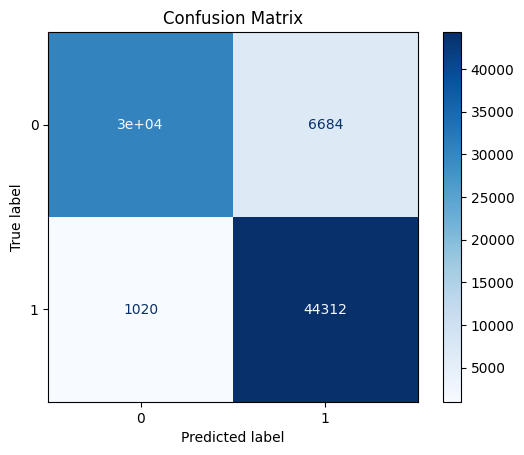

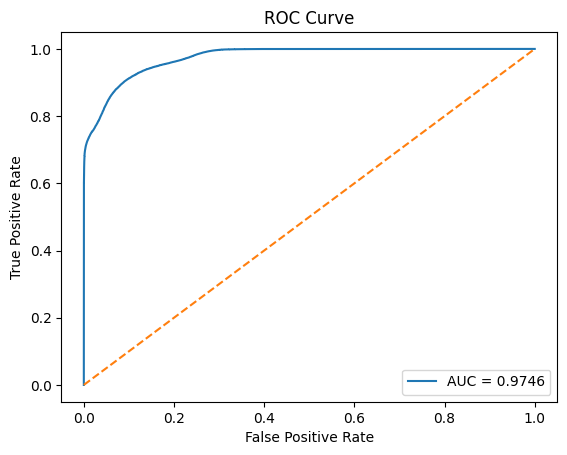

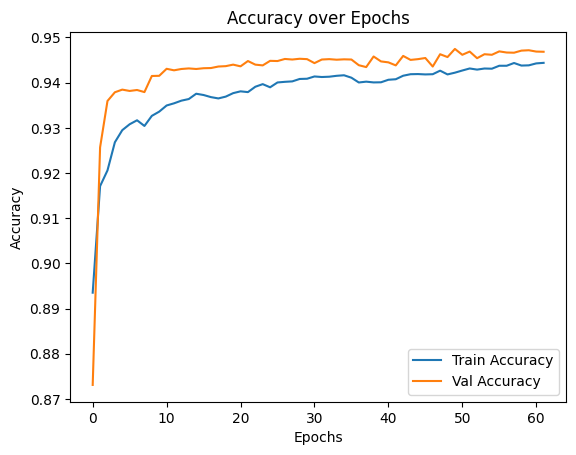

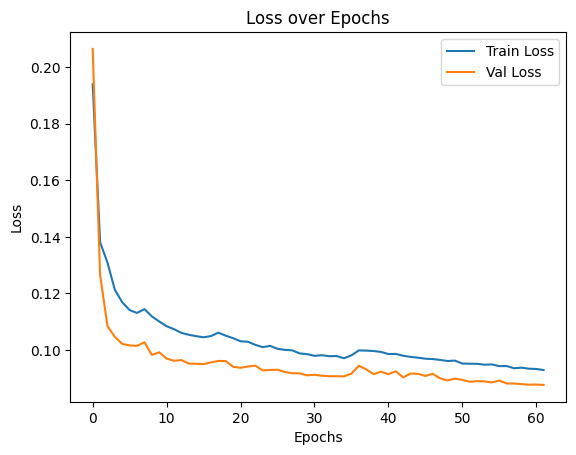

In [ ]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input, Conv1D,
                                     MaxPooling1D, Flatten, Add, Layer, Multiply)
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import matplotlib.pyplot as plt

# === Custom Layers ===
class Attention(Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.dense = Dense(units, activation='tanh')
        self.score = Dense(1, activation='sigmoid')

    def call(self, inputs):
        scores = self.score(self.dense(inputs))
        return Multiply()([inputs, scores])

def combined_loss(alpha=0.3):
    mse = tf.keras.losses.MeanSquaredError()
    ce = tf.keras.losses.CategoricalCrossentropy()
    def loss_fn(y_true, y_pred):
        return alpha * mse(y_true, y_pred) + (1 - alpha) * ce(y_true, y_pred)
    return loss_fn

def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)
    x = Add()([shortcut, x])
    x = tf.keras.activations.relu(x)
    return x

def build_model(input_shape, num_classes):
    inp = Input(shape=input_shape)
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    cnn_features = Dense(64, activation='relu')(x)
    attention_output = Attention(64)(cnn_features)
    x = residual_block(attention_output, 64)
    x = residual_block(x, 64)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='sigmoid', dtype='float32')(x)
    model = Model(inputs=inp, outputs=out)
    return model

# === Load and preprocess data ===
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

# === Encode categorical columns ===
categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]])
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# === Prepare raw features and labels ===
X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# === Feature Selection using Mutual Information ===
feature_names = train_df.drop(columns=['label']).columns
mi_scores = mutual_info_classif(X_train_raw, y_train_raw, discrete_features='auto', random_state=42)
mi_ranking = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)
top_features = mi_ranking.head(30).index.tolist()
print("Top 30 selected features:\n", top_features)

# === Reduce data to selected features ===
X_train_raw = train_df[top_features].values
X_test_raw = test_df[top_features].values

# === Apply SMOTE and shuffle ===
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# === Scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# === One-hot encode labels ===
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

# === Reshape for CNN ===
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# === Train CNN model ===
tf.keras.backend.clear_session()
model = build_model((X_train.shape[1], 1), num_classes)
loss_fn = combined_loss(alpha=0.3)
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(0.001, first_decay_steps=500)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)]
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
                    validation_split=0.1, callbacks=callbacks, verbose=2)

# === Train XGBoost ===
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
xgb_model.fit(X_train, y_train_bal)

# === Ensemble Inference (Weighted Voting) ===
preds_nn = model.predict(X_test_cnn, verbose=0)
preds_xgb = xgb_model.predict_proba(X_test)
final_preds = 0.7 * preds_nn + 0.3 * preds_xgb
final_class = np.argmax(final_preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Weighted Voting Ensemble):")
print(classification_report(true_class, final_class))

# === Metrics ===
acc = accuracy_score(true_class, final_class)
precision = precision_score(true_class, final_class, average='weighted')
recall = recall_score(true_class, final_class, average='weighted')
f1 = f1_score(true_class, final_class, average='weighted')
fpr, tpr, _ = roc_curve(y_test.ravel(), final_preds.ravel())
roc_auc = auc(fpr, tpr)

print(f"\nAccuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {roc_auc:.4f}")

# === Confusion Matrix ===
plt.figure()
ConfusionMatrixDisplay(confusion_matrix(true_class, final_class)).plot(cmap='Blues')
plt.title("Confusion Matrix")

# === ROC Curve ===
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# === Accuracy over Epochs ===
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# === Loss over Epochs ===
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.show()


Other Primary Versions ( were not used in the report )

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training time: 275.15s
Accuracy: 0.8601
Precision: 0.8113
Recall: 0.9721
F1 Score: 0.8844
AUC-ROC: 0.9725

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     37000
           1       0.81      0.97      0.88     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.85     82332
weighted avg       0.88      0.86      0.86     82332



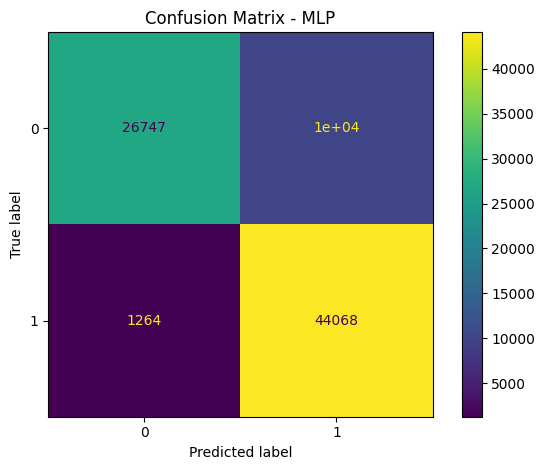

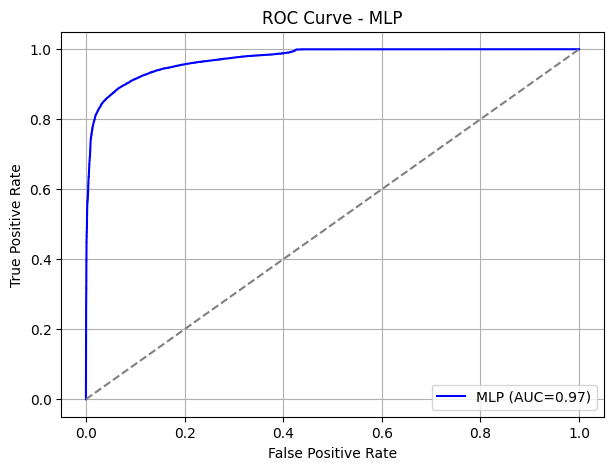

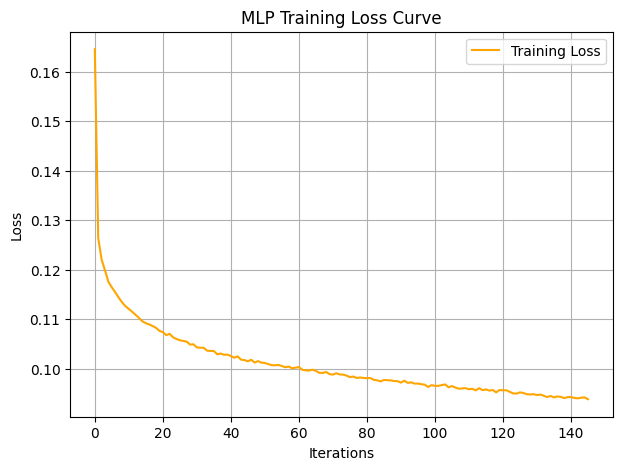

['/content/mlp_unsw_scaler.pkl']

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)

# -------------------------------
# Load and preprocess data
# -------------------------------
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

# Drop unnecessary columns
train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

# Encode categorical features
categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    all_vals = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(all_vals)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Split features and labels
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']
X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Train MLP
# -------------------------------
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.001,         # L2 regularization strength
    max_iter=300,
    random_state=42
)

start_time = time.time()
mlp.fit(X_train_scaled, y_train)
elapsed_time = time.time() - start_time

# -------------------------------
# Predictions & Metrics
# -------------------------------
y_pred = mlp.predict(X_test_scaled)
y_prob = mlp.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Training time: {elapsed_time:.2f}s")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------------
# Confusion Matrix
# -------------------------------
conf_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_mat).plot()
plt.title("Confusion Matrix - MLP")
plt.grid(False)
plt.tight_layout()
plt.show()

# -------------------------------
# ROC Curve
# -------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"MLP (AUC={roc_auc:.2f})", color='blue')
plt.plot([0,1],[0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Loss Curve
# -------------------------------
plt.figure(figsize=(7,5))
plt.plot(mlp.loss_curve_, label='Training Loss', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Training Loss Curve')
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# Save model & scaler
# -------------------------------
joblib.dump(mlp, '/content/mlp_unsw_model.pkl')
joblib.dump(scaler, '/content/mlp_unsw_scaler.pkl')


=== Decision Tree (No Scaling) ===

k=5
Selected Features: ['rate', 'sload', 'dload', 'stcpb', 'dtcpb']
Accuracy: 0.8413, Precision: 0.8063, Recall: 0.9370, F1: 0.8667, AUC: 0.8434, Time: 1.87s

k=10
Selected Features: ['sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sinpkt', 'djit', 'stcpb', 'dtcpb', 'response_body_len']
Accuracy: 0.8644, Precision: 0.8266, Recall: 0.9538, F1: 0.8856, AUC: 0.8687, Time: 2.10s

k=15
Selected Features: ['sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.8681, Precision: 0.8303, Recall: 0.9557, F1: 0.8886, AUC: 0.8740, Time: 1.81s

k=20
Selected Features: ['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.8689, Precision: 0.8306, Recall: 0.9572, F1: 0.8894, AUC: 0.8761, Time: 2.08s

k=25
Selected Feature

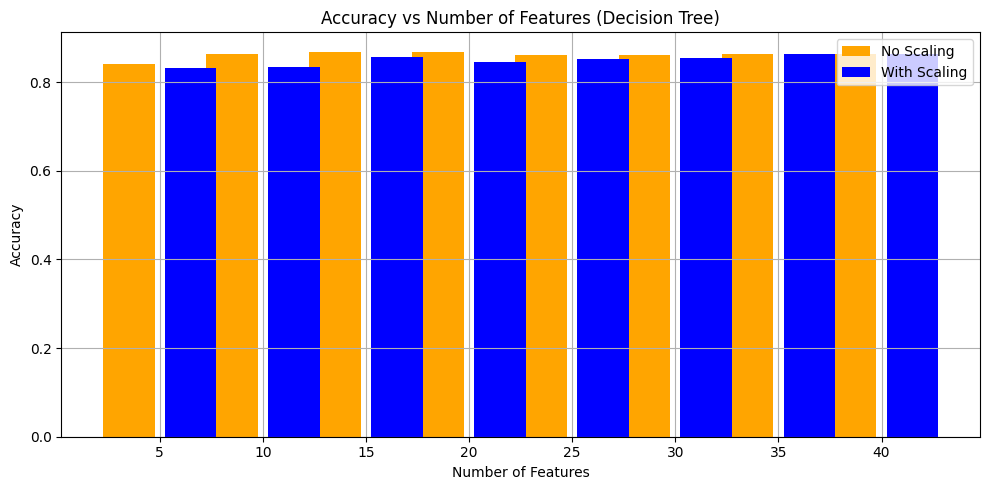

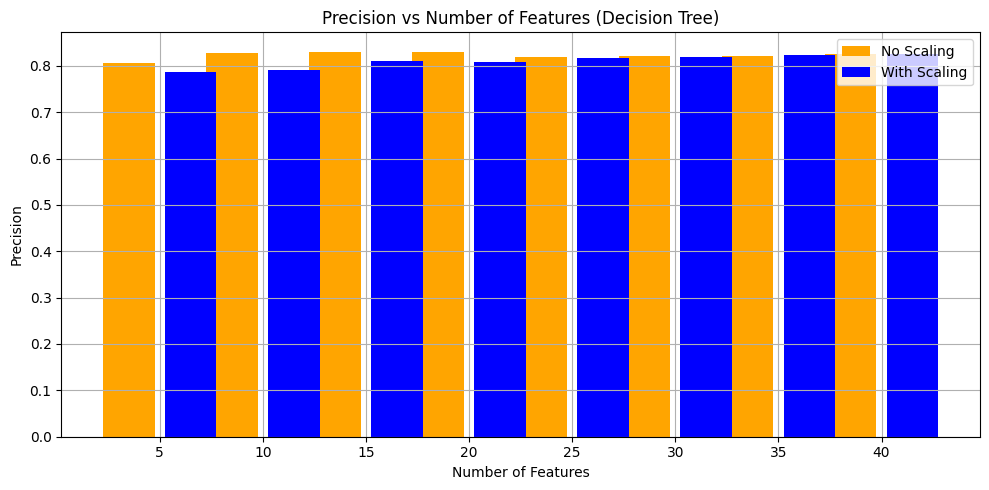

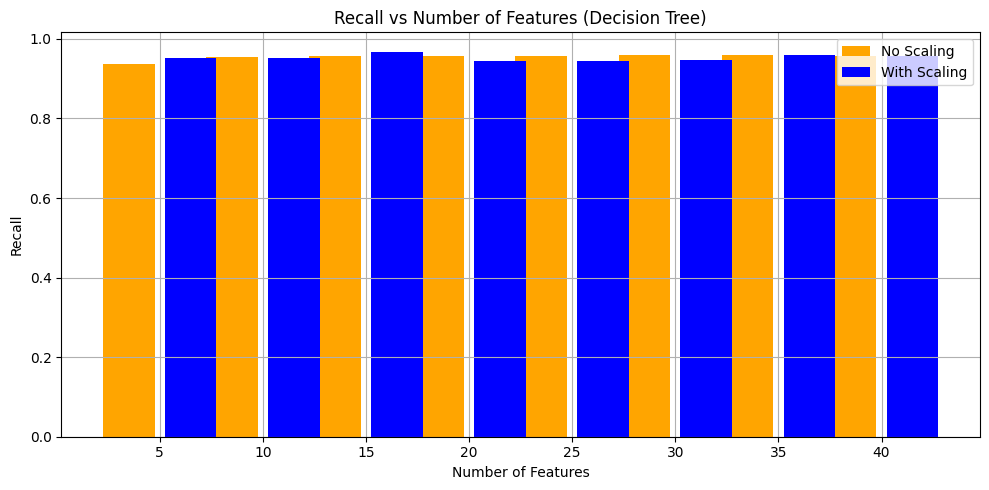

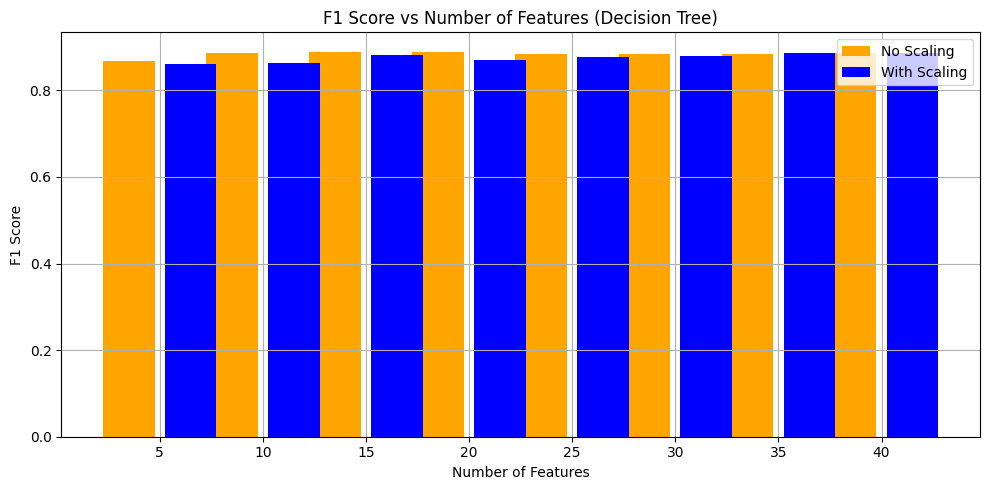

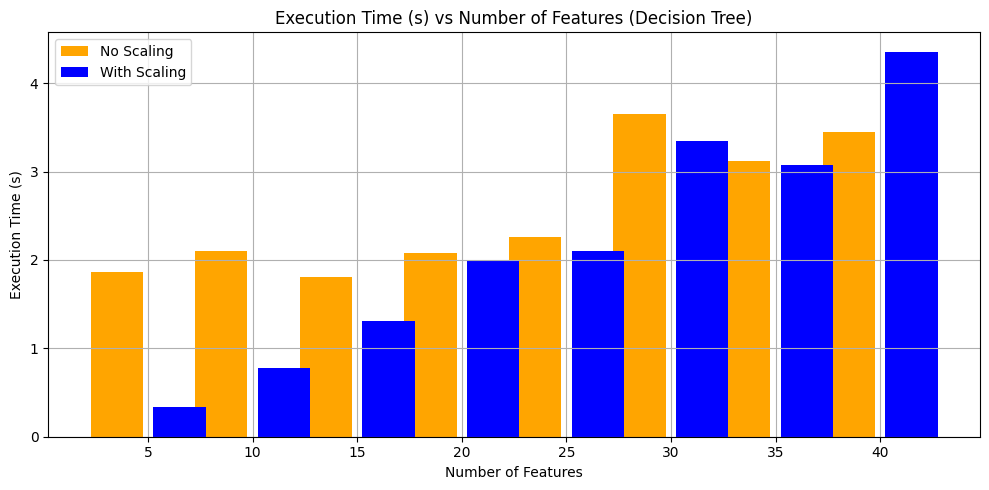

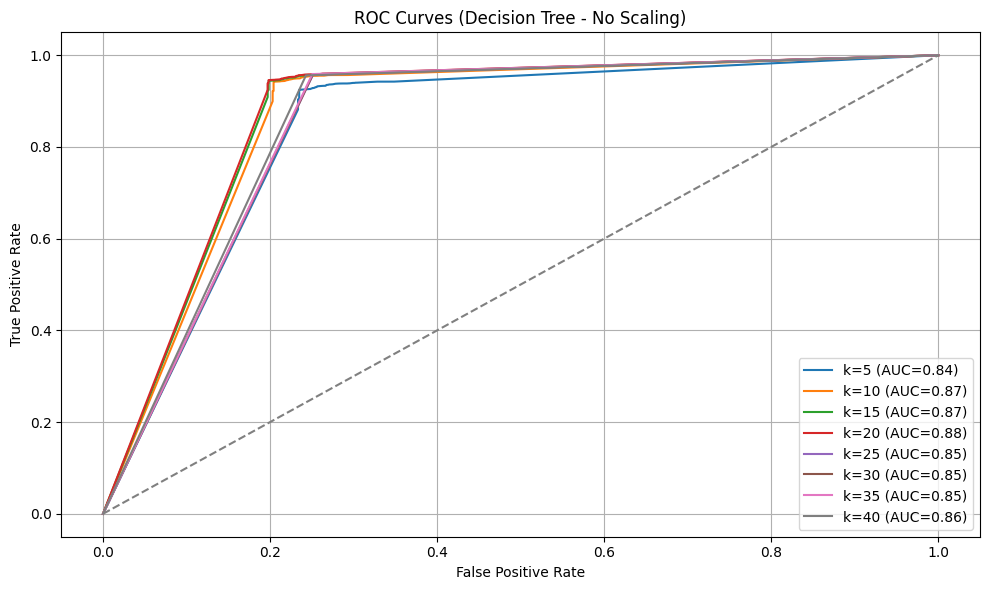

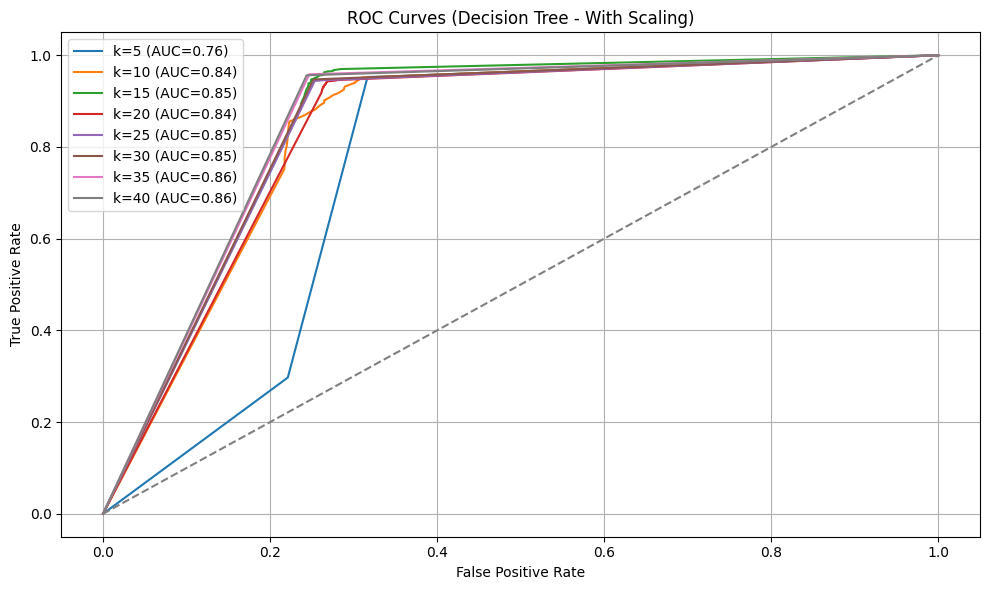

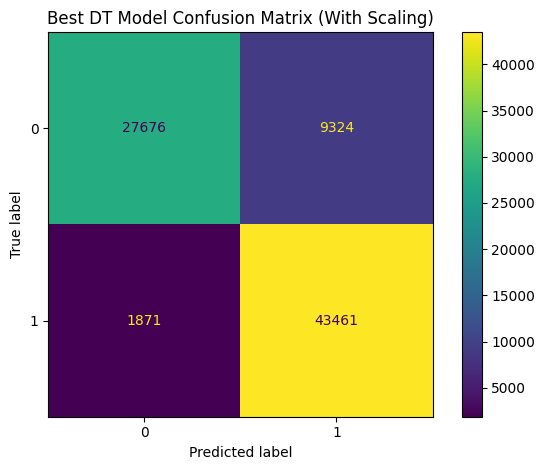

['/content/best_dt_unsw_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve
)

# -------------------------------
# Load and Preprocess UNSW Dataset
# -------------------------------
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    all_vals = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(all_vals)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_ns = train_df.drop(columns=['label'])
y_train_ns = train_df['label']
X_test_ns = test_df.drop(columns=['label'])
y_test_ns = test_df['label']

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train_ns)
X_test_s = scaler.transform(X_test_ns)
y_train_s = y_train_ns
y_test_s = y_test_ns

# -------------------------------
# Evaluation Function
# -------------------------------
def evaluate_dt(X_train, X_test, y_train, y_test):
    results = []
    step = 5
    k_vals = list(range(5, X_train_ns.shape[1] + 1, step))
    for k in k_vals:
        selector = SelectKBest(score_func=chi2, k=k)
        X_train_sel = selector.fit_transform(X_train, y_train)
        X_test_sel = selector.transform(X_test)
        features = [X_train_ns.columns[i] for i in selector.get_support(indices=True)]

        model = DecisionTreeClassifier(random_state=42)
        start_time = time.time()
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        y_prob = model.predict_proba(X_test_sel)[:, 1]
        elapsed_time = time.time() - start_time

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        print(f"\nk={k}\nSelected Features: {features}\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}, Time: {elapsed_time:.2f}s")

        results.append({
            'k': k,
            'features': features,
            'acc': acc,
            'prec': prec,
            'rec': rec,
            'f1': f1,
            'roc_auc': roc_auc,
            'time': elapsed_time,
            'model': model,
            'conf_matrix': confusion_matrix(y_test, y_pred),
            'fpr': fpr,
            'tpr': tpr
        })

    return results

# -------------------------------
# Run Evaluation
# -------------------------------
print("=== Decision Tree (No Scaling) ===")
results_ns = evaluate_dt(X_train_ns, X_test_ns, y_train_ns, y_test_ns)

print("\n=== Decision Tree (With Scaling) ===")
results_s = evaluate_dt(X_train_s, X_test_s, y_train_s, y_test_s)

# -------------------------------
# Plot Metrics
# -------------------------------
def plot_metric(metric, ylabel):
    k_vals = [r['k'] for r in results_ns]
    metric_ns = [r[metric] for r in results_ns]
    metric_s = [r[metric] for r in results_s]

    plt.figure(figsize=(10, 5))
    plt.bar([k - 1.5 for k in k_vals], metric_ns, width=2.5, label='No Scaling', color='orange')
    plt.bar([k + 1.5 for k in k_vals], metric_s, width=2.5, label='With Scaling', color='blue')
    plt.xlabel('Number of Features')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Number of Features (Decision Tree)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_metric('acc', 'Accuracy')
plot_metric('prec', 'Precision')
plot_metric('rec', 'Recall')
plot_metric('f1', 'F1 Score')
plot_metric('time', 'Execution Time (s)')

# -------------------------------
# ROC Curve Plot
# -------------------------------
def plot_roc_curves(results, title):
    plt.figure(figsize=(10, 6))
    for r in results:
        plt.plot(r['fpr'], r['tpr'], label=f"k={r['k']} (AUC={r['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves(results_ns, "ROC Curves (Decision Tree - No Scaling)")
plot_roc_curves(results_s, "ROC Curves (Decision Tree - With Scaling)")

# -------------------------------
# Confusion Matrix Example (Best Model)
# -------------------------------
best_result = max(results_s, key=lambda r: r['f1'])
ConfusionMatrixDisplay(confusion_matrix=best_result['conf_matrix']).plot()
plt.title('Best DT Model Confusion Matrix (With Scaling)')
plt.grid(False)
plt.tight_layout()
plt.show()

# -------------------------------
# Save Best Model
# -------------------------------
joblib.dump(best_result['model'], '/content/best_dt_unsw_model.pkl')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE

# Load UNSW dataset
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# Apply SMOTE to balance classes
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# Scale data after SMOTE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# One-hot encode the labels
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

num_classes = len(np.unique(y_train_raw))
y_train = one_hot_encode(y_train_bal, num_classes)
y_test = one_hot_encode(y_test_raw, num_classes)

# Neural network utilities
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return z > 0

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
    return np.sum(log_likelihood) / m

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m, self.v = {}, {}
        self.t = 0

    def update_params(self, params, grads):
        self.t += 1
        updated_params = {}
        for key in params:
            if key not in self.m:
                self.m[key] = np.zeros_like(grads[key])
                self.v[key] = np.zeros_like(grads[key])
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * (grads[key] ** 2)
            m_hat = self.m[key] / (1 - self.beta1 ** self.t)
            v_hat = self.v[key] / (1 - self.beta2 ** self.t)
            updated_params[key] = params[key] - self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return updated_params

class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lambda_reg=0.01):
        self.lambda_reg = lambda_reg
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, hidden_size3) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, hidden_size3))
        self.W4 = np.random.randn(hidden_size3, output_size) * np.sqrt(2. / hidden_size3)
        self.b4 = np.zeros((1, output_size))
        self.optimizer = AdamOptimizer()

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = relu(self.Z3)
        self.Z4 = np.dot(self.A3, self.W4) + self.b4
        self.A4 = softmax(self.Z4)
        return self.A4

    def backward(self, X, Y):
        m = Y.shape[0]
        dZ4 = self.A4 - Y
        dW4 = (np.dot(self.A3.T, dZ4) + self.lambda_reg * self.W4) / m
        db4 = np.sum(dZ4, axis=0, keepdims=True) / m

        dA3 = np.dot(dZ4, self.W4.T)
        dZ3 = dA3 * relu_derivative(self.Z3)
        dW3 = (np.dot(self.A2.T, dZ3) + self.lambda_reg * self.W3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = (np.dot(self.A1.T, dZ2) + self.lambda_reg * self.W2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = (np.dot(X.T, dZ1) + self.lambda_reg * self.W1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        grads = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2, 'W3': dW3, 'b3': db3, 'W4': dW4, 'b4': db4}
        params = {'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2, 'W3': self.W3, 'b3': self.b3, 'W4': self.W4, 'b4': self.b4}
        updated_params = self.optimizer.update_params(params, grads)

        self.W1, self.b1 = updated_params['W1'], updated_params['b1']
        self.W2, self.b2 = updated_params['W2'], updated_params['b2']
        self.W3, self.b3 = updated_params['W3'], updated_params['b3']
        self.W4, self.b4 = updated_params['W4'], updated_params['b4']

    def train(self, X_train, Y_train, X_test, Y_test, epochs=1000, batch_size=256, patience=100):
        best_acc = 0
        patience_counter = 0
        for epoch in range(epochs):
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            for i in range(0, X_train.shape[0], batch_size):
                batch_idx = indices[i:i+batch_size]
                X_batch = X_train[batch_idx]
                Y_batch = Y_train[batch_idx]
                self.forward(X_batch)
                self.backward(X_batch, Y_batch)

            if epoch % 50 == 0 or epoch == epochs - 1:
                train_loss = cross_entropy_loss(self.forward(X_train), Y_train)
                test_loss, test_acc = self.evaluate(X_test, Y_test)
                print(f"Epoch {epoch}: Train Loss={train_loss:.4f}, Test Loss={test_loss:.4f}, Test Acc={test_acc:.4f}")

                if test_acc > best_acc:
                    best_acc = test_acc
                    patience_counter = 0
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        print("Early stopping triggered.")
                        break

    def evaluate(self, X, Y):
        output = self.forward(X)
        loss = cross_entropy_loss(output, Y)
        preds = np.argmax(output, axis=1)
        labels = np.argmax(Y, axis=1)
        acc = np.mean(preds == labels)
        return loss, acc

input_size = X_train.shape[1]
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
output_size = num_classes

nn = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
nn.train(X_train, y_train, X_test, y_test, epochs=1000)

# Evaluate and report
preds = np.argmax(nn.forward(X_test), axis=1)
true = np.argmax(y_test, axis=1)
print("\nClassification Report (Raw Predictions):")
print(classification_report(true, preds))


Epoch 0: Train Loss=0.1402, Test Loss=0.2736, Test Acc=0.8650
Epoch 50: Train Loss=0.1244, Test Loss=0.2597, Test Acc=0.8642


KeyboardInterrupt: 

=== Logistic Regression (No Scaling) ===

k=5
Selected Features: ['rate', 'sload', 'dload', 'stcpb', 'dtcpb']
Accuracy: 0.6911, Precision: 0.6479, Recall: 0.9615, F1: 0.7741, AUC: 0.8133, Time: 0.95s

k=10
Selected Features: ['sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sinpkt', 'djit', 'stcpb', 'dtcpb', 'response_body_len']
Accuracy: 0.7068, Precision: 0.6613, Recall: 0.9582, F1: 0.7825, AUC: 0.8168, Time: 1.31s

k=15
Selected Features: ['sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.7076, Precision: 0.6614, Recall: 0.9610, F1: 0.7835, AUC: 0.8156, Time: 1.84s

k=20
Selected Features: ['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'response_body_len']
Accuracy: 0.7076, Precision: 0.6614, Recall: 0.9610, F1: 0.7835, AUC: 0.8156, Time: 2.30s

k=25
Selected F

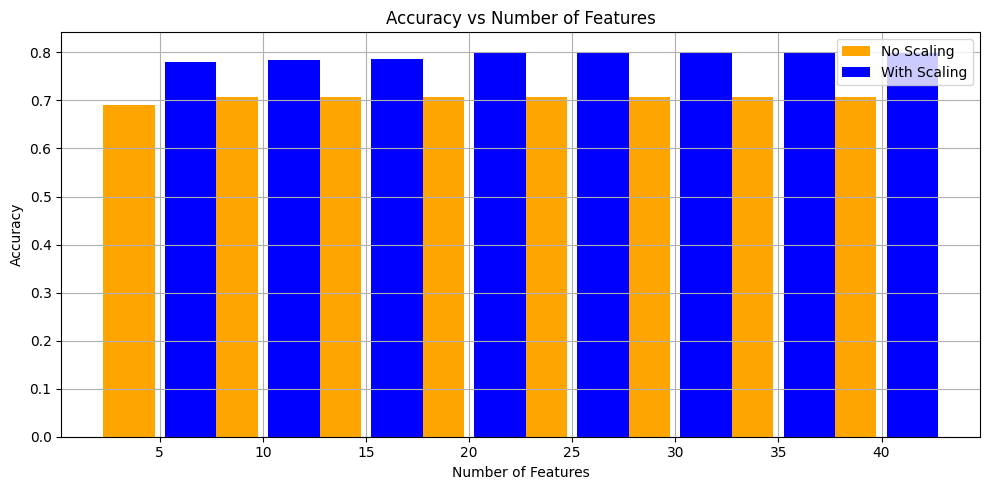

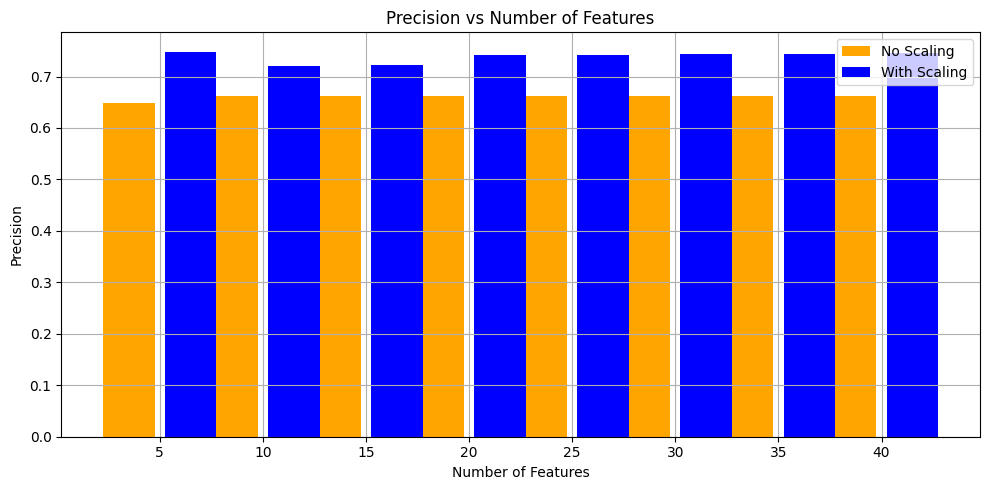

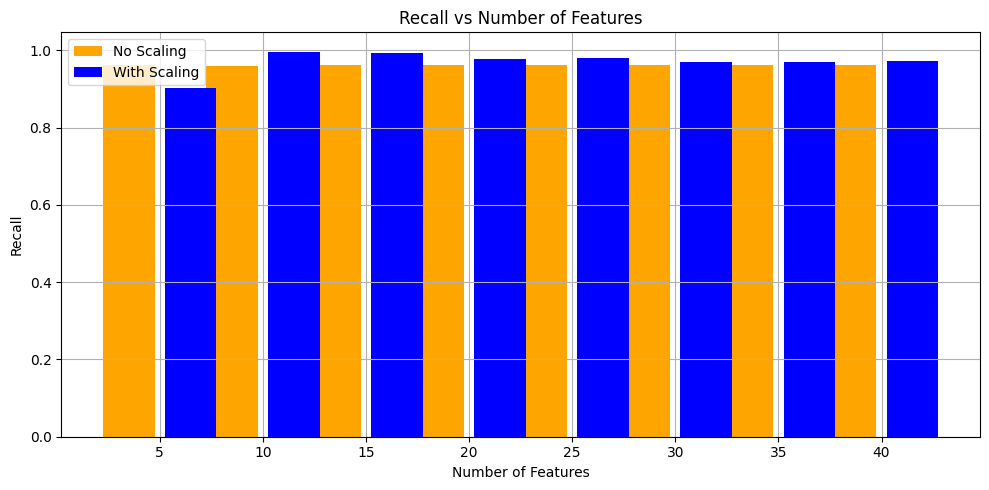

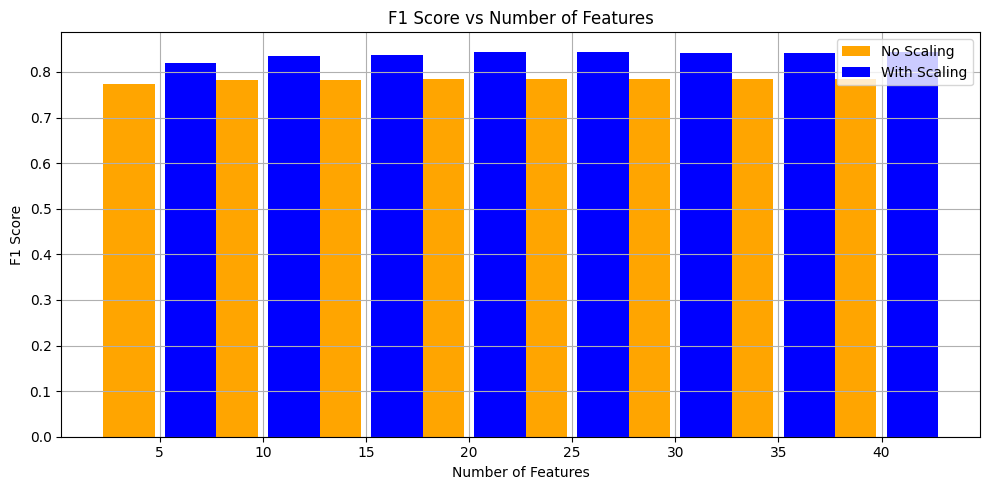

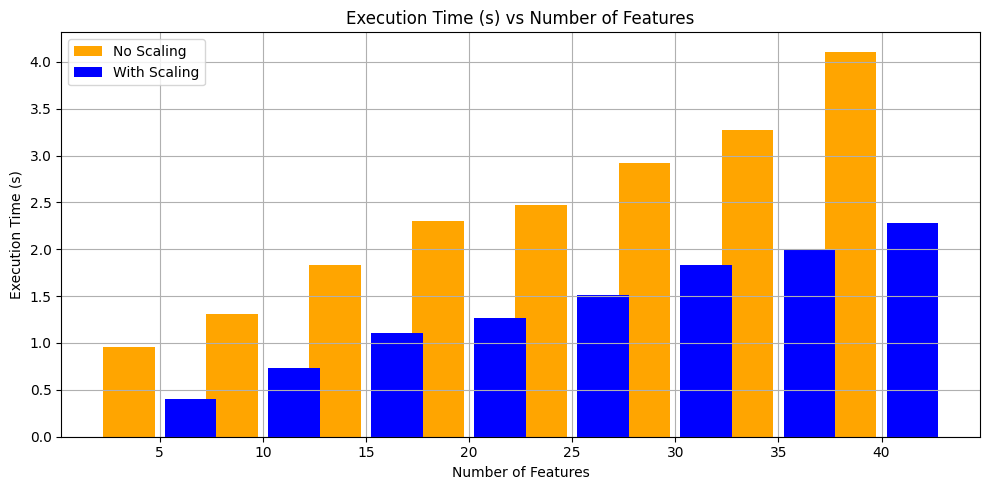

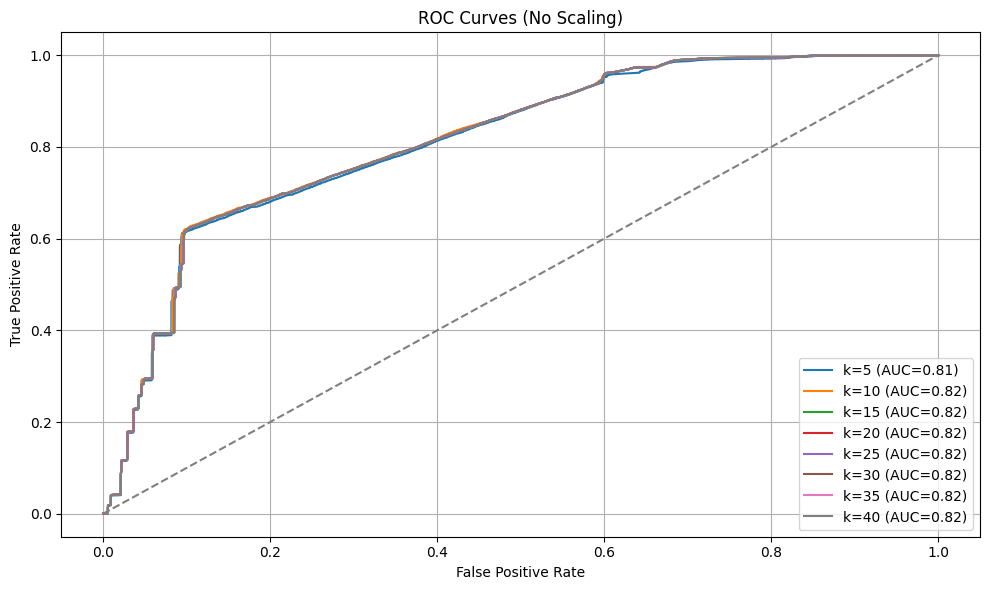

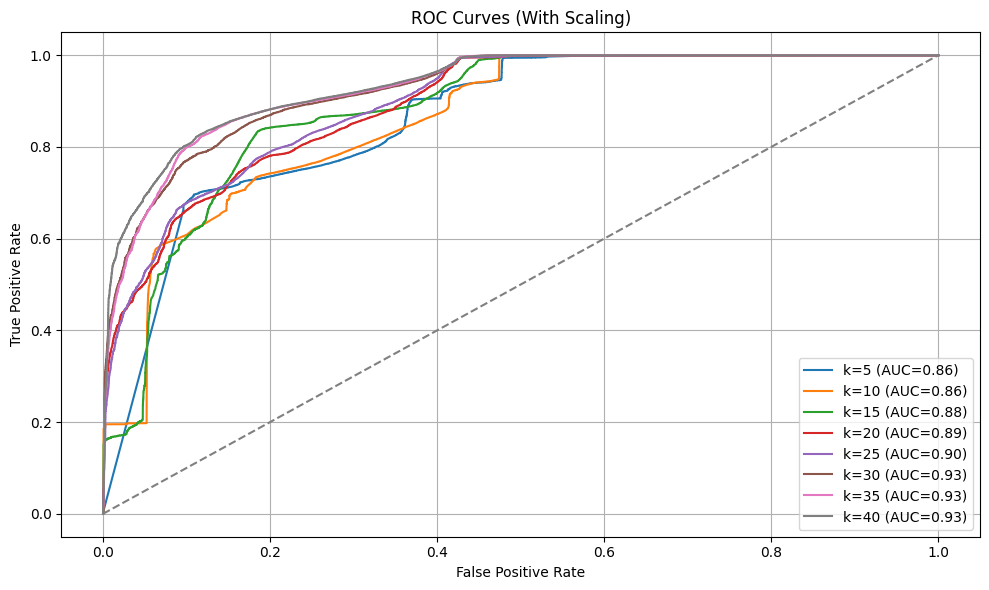

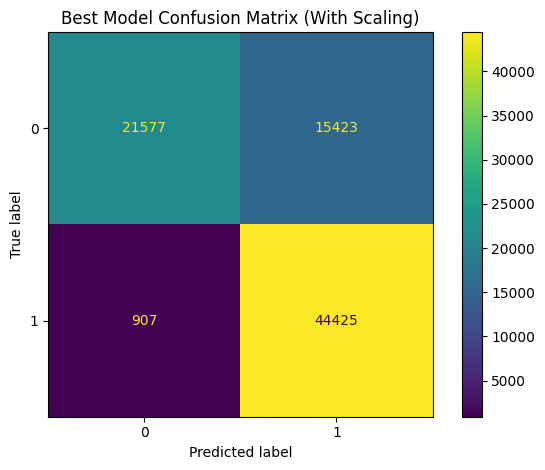

['/content/best_logreg_unsw_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

# -------------------------------
# Load and Preprocess UNSW Dataset
# -------------------------------
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    all_vals = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(all_vals)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_ns = train_df.drop(columns=['label'])
y_train_ns = train_df['label']
X_test_ns = test_df.drop(columns=['label'])
y_test_ns = test_df['label']

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train_ns)
X_test_s = scaler.transform(X_test_ns)
y_train_s = y_train_ns
y_test_s = y_test_ns

# -------------------------------
# Evaluation Function
# -------------------------------
def evaluate(X_train, X_test, y_train, y_test, scaled=False):
    results = []
    step = 5
    k_vals = list(range(5, X_train_ns.shape[1] + 1, step))
    for k in k_vals:
        selector = SelectKBest(score_func=chi2, k=k)
        X_train_sel = selector.fit_transform(X_train, y_train)
        X_test_sel = selector.transform(X_test)
        features = [X_train_ns.columns[i] for i in selector.get_support(indices=True)]

        model = LogisticRegression(max_iter=2000, solver='liblinear')
        start_time = time.time()
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        y_prob = model.predict_proba(X_test_sel)[:, 1]
        elapsed_time = time.time() - start_time

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        print(f"\nk={k}\nSelected Features: {features}\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}, Time: {elapsed_time:.2f}s")

        results.append({
            'k': k,
            'features': features,
            'acc': acc,
            'prec': prec,
            'rec': rec,
            'f1': f1,
            'roc_auc': roc_auc,
            'time': elapsed_time,
            'model': model,
            'conf_matrix': confusion_matrix(y_test, y_pred),
            'fpr': fpr,
            'tpr': tpr
        })

    return results

# -------------------------------
# Run Evaluation
# -------------------------------
print("=== Logistic Regression (No Scaling) ===")
results_ns = evaluate(X_train_ns, X_test_ns, y_train_ns, y_test_ns, scaled=False)

print("\n=== Logistic Regression (With Scaling) ===")
results_s = evaluate(X_train_s, X_test_s, y_train_s, y_test_s, scaled=True)

# -------------------------------
# Plot Metrics
# -------------------------------
def plot_metric(metric, ylabel):
    k_vals = [r['k'] for r in results_ns]
    metric_ns = [r[metric] for r in results_ns]
    metric_s = [r[metric] for r in results_s]

    plt.figure(figsize=(10, 5))
    plt.bar([k - 1.5 for k in k_vals], metric_ns, width=2.5, label='No Scaling', color='orange')
    plt.bar([k + 1.5 for k in k_vals], metric_s, width=2.5, label='With Scaling', color='blue')
    plt.xlabel('Number of Features')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Number of Features')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_metric('acc', 'Accuracy')
plot_metric('prec', 'Precision')
plot_metric('rec', 'Recall')
plot_metric('f1', 'F1 Score')
plot_metric('time', 'Execution Time (s)')

# -------------------------------
# ROC Curve Plot
# -------------------------------
def plot_roc_curves(results, title):
    plt.figure(figsize=(10, 6))
    for r in results:
        plt.plot(r['fpr'], r['tpr'], label=f"k={r['k']} (AUC={r['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves(results_ns, "ROC Curves (No Scaling)")
plot_roc_curves(results_s, "ROC Curves (With Scaling)")

# -------------------------------
# Confusion Matrix Example (Best Model)
# -------------------------------
best_result = max(results_s, key=lambda r: r['f1'])
ConfusionMatrixDisplay(confusion_matrix=best_result['conf_matrix']).plot()
plt.title('Best Model Confusion Matrix (With Scaling)')
plt.grid(False)
plt.tight_layout()
plt.show()

# -------------------------------
# Save Best Model
# -------------------------------
joblib.dump(best_result['model'], '/content/best_logreg_unsw_model.pkl')

BEST MLP ----------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical

# Load UNSW dataset
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# One-hot encoding
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

# Build MLP with TensorFlow
tf.keras.backend.clear_session()
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model with early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100, batch_size=512,
          validation_split=0.1, callbacks=[callback], verbose=2)

# Evaluate
preds = model.predict(X_test, verbose=0)
preds_class = np.argmax(preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Raw Predictions):")
print(classification_report(true_class, preds_class))


Epoch 1/100
420/420 - 8s - 20ms/step - accuracy: 0.8695 - loss: 0.3085 - val_accuracy: 0.9283 - val_loss: 0.1544
Epoch 2/100
420/420 - 4s - 11ms/step - accuracy: 0.9132 - loss: 0.1961 - val_accuracy: 0.9306 - val_loss: 0.1367
Epoch 3/100
420/420 - 5s - 13ms/step - accuracy: 0.9189 - loss: 0.1740 - val_accuracy: 0.9377 - val_loss: 0.1297
Epoch 4/100
420/420 - 4s - 9ms/step - accuracy: 0.9235 - loss: 0.1610 - val_accuracy: 0.9381 - val_loss: 0.1232
Epoch 5/100
420/420 - 6s - 15ms/step - accuracy: 0.9260 - loss: 0.1542 - val_accuracy: 0.9372 - val_loss: 0.1247
Epoch 6/100
420/420 - 4s - 8ms/step - accuracy: 0.9276 - loss: 0.1480 - val_accuracy: 0.9419 - val_loss: 0.1184
Epoch 7/100
420/420 - 6s - 14ms/step - accuracy: 0.9290 - loss: 0.1448 - val_accuracy: 0.9428 - val_loss: 0.1174
Epoch 8/100
420/420 - 4s - 11ms/step - accuracy: 0.9304 - loss: 0.1420 - val_accuracy: 0.9404 - val_loss: 0.1179
Epoch 9/100
420/420 - 5s - 12ms/step - accuracy: 0.9305 - loss: 0.1398 - val_accuracy: 0.9425 - va

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical

# Load UNSW dataset
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# One-hot encoding
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_raw), y=y_train_raw)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    def loss_fn(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1. - 1e-7)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        return tf.reduce_sum(loss, axis=1)
    return loss_fn

# Build MLP with AdamW optimizer and learning rate scheduler
tf.keras.backend.clear_session()
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss=focal_loss(),
              metrics=['accuracy'])

# Callbacks
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=512,
          validation_split=0.1, callbacks=[callback, lr_schedule],
          class_weight=class_weight_dict,
          verbose=2)

# Evaluate
preds = model.predict(X_test, verbose=0)
preds_class = np.argmax(preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Raw Predictions):")
print(classification_report(true_class, preds_class))


Epoch 1/100
420/420 - 10s - 23ms/step - accuracy: 0.8186 - loss: 0.0290 - val_accuracy: 0.8951 - val_loss: 0.0123 - learning_rate: 1.0000e-03
Epoch 2/100
420/420 - 4s - 8ms/step - accuracy: 0.8801 - loss: 0.0158 - val_accuracy: 0.9143 - val_loss: 0.0105 - learning_rate: 1.0000e-03
Epoch 3/100
420/420 - 6s - 14ms/step - accuracy: 0.9022 - loss: 0.0133 - val_accuracy: 0.9182 - val_loss: 0.0100 - learning_rate: 1.0000e-03
Epoch 4/100
420/420 - 4s - 8ms/step - accuracy: 0.9094 - loss: 0.0120 - val_accuracy: 0.9139 - val_loss: 0.0098 - learning_rate: 1.0000e-03
Epoch 5/100
420/420 - 4s - 8ms/step - accuracy: 0.9146 - loss: 0.0113 - val_accuracy: 0.9188 - val_loss: 0.0093 - learning_rate: 1.0000e-03
Epoch 6/100
420/420 - 4s - 10ms/step - accuracy: 0.9170 - loss: 0.0108 - val_accuracy: 0.9246 - val_loss: 0.0088 - learning_rate: 1.0000e-03
Epoch 7/100
420/420 - 5s - 11ms/step - accuracy: 0.9197 - loss: 0.0103 - val_accuracy: 0.9258 - val_loss: 0.0086 - learning_rate: 1.0000e-03
Epoch 8/100
420

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalAveragePooling1D, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
# Load UNSW dataset
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# Reshape for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# One-hot encoding
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)

# Build CNN model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
X_train = X_train[:50000]
y_train = y_train[:50000]
# Train model
model.fit(X_train, y_train, epochs=100, batch_size=2048, validation_split=0.1, callbacks=[callback], verbose=2)

# Evaluate
preds = model.predict(X_test, verbose=0)
preds_class = np.argmax(preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Raw Predictions):")
print(classification_report(true_class, preds_class))


Epoch 1/100


HYBRID CNN -----------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Conv1D, MaxPooling1D, Flatten, Reshape
from tensorflow.keras.utils import to_categorical

# Load UNSW dataset
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# One-hot encoding
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

# Reshape input for Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build CNN-MLP hybrid model
tf.keras.backend.clear_session()
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model with early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model.fit(X_train_cnn, y_train, epochs=100, batch_size=512,
          validation_split=0.1, callbacks=[callback], verbose=2)

# Evaluate
preds = model.predict(X_test_cnn, verbose=0)
preds_class = np.argmax(preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Raw Predictions):")
print(classification_report(true_class, preds_class))


Epoch 1/100
420/420 - 25s - 60ms/step - accuracy: 0.8798 - loss: 0.2775 - val_accuracy: 0.9328 - val_loss: 0.1453
Epoch 2/100
420/420 - 20s - 47ms/step - accuracy: 0.9190 - loss: 0.1793 - val_accuracy: 0.9402 - val_loss: 0.1347
Epoch 3/100
420/420 - 19s - 46ms/step - accuracy: 0.9240 - loss: 0.1622 - val_accuracy: 0.9416 - val_loss: 0.1219
Epoch 4/100
420/420 - 21s - 50ms/step - accuracy: 0.9266 - loss: 0.1538 - val_accuracy: 0.9436 - val_loss: 0.1175
Epoch 5/100
420/420 - 39s - 94ms/step - accuracy: 0.9284 - loss: 0.1483 - val_accuracy: 0.9435 - val_loss: 0.1165
Epoch 6/100
420/420 - 20s - 48ms/step - accuracy: 0.9311 - loss: 0.1431 - val_accuracy: 0.9433 - val_loss: 0.1156
Epoch 7/100
420/420 - 20s - 47ms/step - accuracy: 0.9318 - loss: 0.1413 - val_accuracy: 0.9429 - val_loss: 0.1157
Epoch 8/100
420/420 - 22s - 52ms/step - accuracy: 0.9324 - loss: 0.1384 - val_accuracy: 0.9466 - val_loss: 0.1128
Epoch 9/100
420/420 - 18s - 43ms/step - accuracy: 0.9343 - loss: 0.1365 - val_accuracy: 

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

# =============================
# Mixed precision (if using GPU)
# =============================
try:
    tf.keras.mixed_precision.set_global_policy('mixed_float16')
except Exception as e:
    print("Mixed precision not enabled:", e)

# =============================
# Load UNSW dataset
# =============================
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# =============================
# Apply SMOTE
# =============================
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# =============================
# Standard scaling
# =============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# One-hot encoding
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

# Reshape input for Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# =============================
# Optimized CNN + MLP model
# =============================
tf.keras.backend.clear_session()
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax', dtype='float32')  # force float32 output
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# =============================
# Callbacks for training
# =============================
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]

# =============================
# Training (bigger batch size)
# =============================
model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
          validation_split=0.1, callbacks=callbacks, verbose=2)

# =============================
# Evaluation
# =============================
preds = model.predict(X_test_cnn, verbose=0)
preds_class = np.argmax(preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Raw Predictions):")
print(classification_report(true_class, preds_class))


Epoch 1/100
210/210 - 14s - 67ms/step - accuracy: 0.8870 - loss: 0.2554 - val_accuracy: 0.9249 - val_loss: 0.1922 - learning_rate: 1.0000e-03
Epoch 2/100
210/210 - 11s - 53ms/step - accuracy: 0.9192 - loss: 0.1740 - val_accuracy: 0.9377 - val_loss: 0.1341 - learning_rate: 1.0000e-03
Epoch 3/100
210/210 - 18s - 87ms/step - accuracy: 0.9241 - loss: 0.1596 - val_accuracy: 0.9384 - val_loss: 0.1247 - learning_rate: 1.0000e-03
Epoch 4/100
210/210 - 9s - 43ms/step - accuracy: 0.9263 - loss: 0.1512 - val_accuracy: 0.9413 - val_loss: 0.1216 - learning_rate: 1.0000e-03
Epoch 5/100
210/210 - 9s - 45ms/step - accuracy: 0.9291 - loss: 0.1453 - val_accuracy: 0.9380 - val_loss: 0.1203 - learning_rate: 1.0000e-03
Epoch 6/100
210/210 - 10s - 48ms/step - accuracy: 0.9307 - loss: 0.1418 - val_accuracy: 0.9434 - val_loss: 0.1162 - learning_rate: 1.0000e-03
Epoch 7/100
210/210 - 8s - 39ms/step - accuracy: 0.9319 - loss: 0.1375 - val_accuracy: 0.9457 - val_loss: 0.1157 - learning_rate: 1.0000e-03
Epoch 8/1

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input, Conv1D,
                                     MaxPooling1D, Flatten, Add, Layer, Multiply, Reshape)
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical

# ============================
# === Custom Layers/Blocks ===
# ============================
class Attention(Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.dense = Dense(units, activation='tanh')
        self.score = Dense(1, activation='softmax')

    def call(self, inputs):
        scores = self.score(self.dense(inputs))
        return Multiply()([inputs, scores])

def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    # Match shortcut dimension if needed
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)
    x = Add()([shortcut, x])
    x = tf.keras.activations.relu(x)
    return x

def build_model(input_shape, num_classes):
    inp = Input(shape=input_shape)

    # CNN branch
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)

    # Dimensionality reduction for residual blocks
    x = Dense(64, activation='relu')(x)

    # Attention
    x = Attention(64)(x)

    # Residual MLP blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    # Final Dense layers
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    out = Dense(num_classes, activation='softmax', dtype='float32')(x)

    model = Model(inputs=inp, outputs=out)
    return model

# ============================
# === Load & Preprocess Data =
# ============================
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# One-hot encoding
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

# Reshape for Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ============================
# === Build & Train Model ====
# ============================
tf.keras.backend.clear_session()
model = build_model((X_train.shape[1], 1), num_classes)

loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(0.001, first_decay_steps=500)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)
]

model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
          validation_split=0.1, callbacks=callbacks, verbose=2)

# ============================
# === Evaluate Model =========
# ============================
preds = model.predict(X_test_cnn, verbose=0)
preds_class = np.argmax(preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Raw Predictions):")
print(classification_report(true_class, preds_class))


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Epoch 1/100
210/210 - 17s - 82ms/step - accuracy: 0.8997 - loss: 0.3662 - val_accuracy: 0.9204 - val_loss: 0.3916
Epoch 2/100
210/210 - 11s - 51ms/step - accuracy: 0.9252 - loss: 0.3169 - val_accuracy: 0.9352 - val_loss: 0.3001
Epoch 3/100
210/210 - 20s - 94ms/step - accuracy: 0.9287 - loss: 0.3095 - val_accuracy: 0.9408 - val_loss: 0.2822
Epoch 4/100
210/210 - 11s - 50ms/step - accuracy: 0.9343 - loss: 0.2975 - val_accuracy: 0.9422 - val_loss: 0.2803
Epoch 5/100
210/210 - 11s - 51ms/step - accuracy: 0.9365 - loss: 0.2923 - val_accuracy: 0.9425 - val_loss: 0.2776
Epoch 6/100
210/210 - 21s - 98ms/step - accuracy: 0.9375 - loss: 0.2900 - val_accuracy: 0.9445 - val_loss: 0.2755
Epoch 7/100
210/210 - 12s - 56ms/step - accuracy: 0.9384 - loss: 0.2886 - val_accuracy: 0.9448 - val_loss: 0.2752
Epoch 8/100
210/210 - 19s - 92ms/step - accuracy: 0.9381 - loss: 0.2889 - val_accuracy: 0.9452 - val_loss: 0.2748
Epoch 9/100
210/210 - 11s - 51ms/step - accuracy: 0.9394 - loss: 0.2868 - val_accuracy: 

KeyboardInterrupt: 

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Epoch 1/100
210/210 - 18s - 87ms/step - accuracy: 0.8952 - loss: 0.3914 - val_accuracy: 0.9266 - val_loss: 0.3511
Epoch 2/100
210/210 - 11s - 52ms/step - accuracy: 0.9236 - loss: 0.3265 - val_accuracy: 0.9357 - val_loss: 0.2973
Epoch 3/100
210/210 - 23s - 109ms/step - accuracy: 0.9275 - loss: 0.3174 - val_accuracy: 0.9393 - val_loss: 0.2891
Epoch 4/100
210/210 - 19s - 88ms/step - accuracy: 0.9326 - loss: 0.3019 - val_accuracy: 0.9421 - val_loss: 0.2813
Epoch 5/100
210/210 - 20s - 94ms/step - accuracy: 0.9355 - loss: 0.2951 - val_accuracy: 0.9423 - val_loss: 0.2793
Epoch 6/100
210/210 - 21s - 101ms/step - accuracy: 0.9373 - loss: 0.2919 - val_accuracy: 0.9433 - val_loss: 0.2768
Epoch 7/100
210/210 - 13s - 61ms/step - accuracy: 0.9377 - loss: 0.2906 - val_accuracy: 0.9442 - val_loss: 0.2760
Epoch 8/100
210/210 - 11s - 55ms/step - accuracy: 0.9372 - loss: 0.2905 - val_accuracy: 0.9431 - val_loss: 0.2779
Epoch 9/100
210/210 - 12s - 55ms/step - accuracy: 0.9385 - loss: 0.2882 - val_accuracy

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:23:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Classification Report (Soft-Voting Ensemble):
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     37000
           1       0.85      0.98      0.91     45332

    accuracy                           0.89     82332
   macro avg       0.91      0.88      0.89     82332
weighted avg       0.90      0.89      0.89     82332


Accuracy:  0.8929
Precision: 0.9026
Recall:    0.8929
F1 Score:  0.8912
AUC:       0.9704


<Figure size 640x480 with 0 Axes>

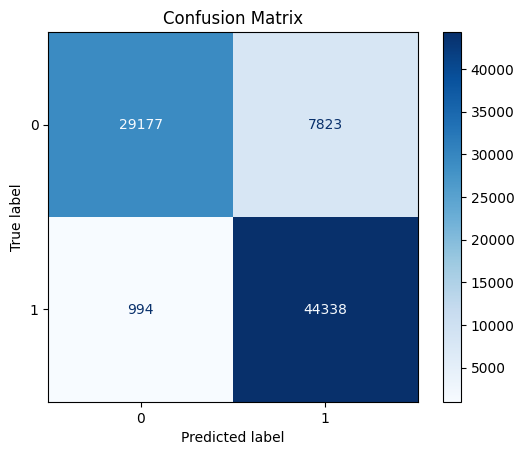

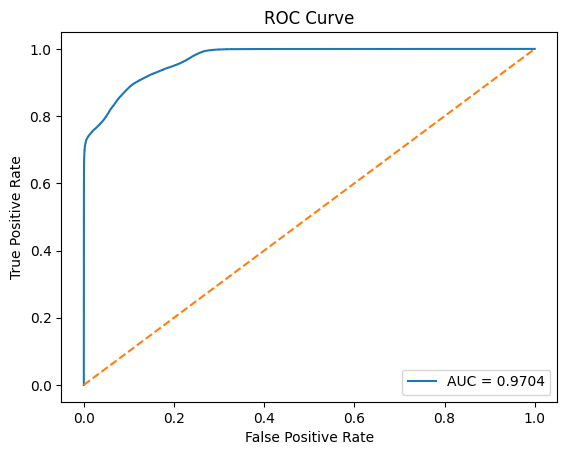

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input, Conv1D,
                                     MaxPooling1D, Flatten, Add, Layer, Multiply)
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import matplotlib.pyplot as plt

# ============================
# === Custom Layers/Blocks ===
# ============================
class Attention(Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.dense = Dense(units, activation='tanh')
        self.score = Dense(1, activation='softmax')

    def call(self, inputs):
        scores = self.score(self.dense(inputs))
        return Multiply()([inputs, scores])

def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)
    x = Add()([shortcut, x])
    x = tf.keras.activations.relu(x)
    return x

def build_model(input_shape, num_classes):
    inp = Input(shape=input_shape)
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    cnn_features = Dense(64, activation='relu')(x)
    attention_output = Attention(64)(cnn_features)
    x = residual_block(attention_output, 64)
    x = residual_block(x, 64)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='softmax', dtype='float32')(x)
    model = Model(inputs=inp, outputs=out)
    return model

# ============================
# === Load & Preprocess Data ===
# ============================
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# === Build & Train CNN-MLP Model ===
tf.keras.backend.clear_session()
model = build_model((X_train.shape[1], 1), num_classes)
loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(0.001, first_decay_steps=500)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)
]
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
                    validation_split=0.1, callbacks=callbacks, verbose=2)

# === Train XGBoost Model ===
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
xgb_model.fit(X_train, y_train_bal)

# === Ensemble Inference ===
preds_nn = model.predict(X_test_cnn, verbose=0)
preds_xgb = xgb_model.predict_proba(X_test)
final_preds = (preds_nn + preds_xgb) / 2
final_class = np.argmax(final_preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Soft-Voting Ensemble):")
print(classification_report(true_class, final_class))

# === Metrics and Visualization ===
acc = accuracy_score(true_class, final_class)
precision = precision_score(true_class, final_class, average='weighted')
recall = recall_score(true_class, final_class, average='weighted')
f1 = f1_score(true_class, final_class, average='weighted')
fpr, tpr, _ = roc_curve(y_test.ravel(), final_preds.ravel())
roc_auc = auc(fpr, tpr)

print(f"\nAccuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {roc_auc:.4f}")

# Plot Confusion Matrix
plt.figure()
ConfusionMatrixDisplay(confusion_matrix(true_class, final_class)).plot(cmap='Blues')
plt.title("Confusion Matrix")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.show()


with modified loss

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input, Conv1D,
                                     MaxPooling1D, Flatten, Add, Layer, Multiply)
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import matplotlib.pyplot as plt

# ============================
# === Custom Layers/Blocks ===
# ============================
class Attention(Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.dense = Dense(units, activation='tanh')
        self.score = Dense(1, activation='softmax')

    def call(self, inputs):
        scores = self.score(self.dense(inputs))
        return Multiply()([inputs, scores])
def combined_loss(alpha=0.3):
    mse = tf.keras.losses.MeanSquaredError()
    ce = tf.keras.losses.CategoricalCrossentropy()
    def loss_fn(y_true, y_pred):
        return alpha * mse(y_true, y_pred) + (1 - alpha) * ce(y_true, y_pred)
    return loss_fn

def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)
    x = Add()([shortcut, x])
    x = tf.keras.activations.relu(x)
    return x

def build_model(input_shape, num_classes):
    inp = Input(shape=input_shape)
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    cnn_features = Dense(64, activation='relu')(x)
    attention_output = Attention(64)(cnn_features)
    x = residual_block(attention_output, 64)
    x = residual_block(x, 64)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='softmax', dtype='float32')(x)
    model = Model(inputs=inp, outputs=out)
    return model

# ============================
# === Load & Preprocess Data ===
# ============================
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# === Build & Train CNN-MLP Model ===
tf.keras.backend.clear_session()
model = build_model((X_train.shape[1], 1), num_classes)
loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(0.001, first_decay_steps=500)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=combined_loss(alpha=0.3), metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)
]
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
                    validation_split=0.1, callbacks=callbacks, verbose=2)

# === Train XGBoost Model ===
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
xgb_model.fit(X_train, y_train_bal)

# === Ensemble Inference ===
preds_nn = model.predict(X_test_cnn, verbose=0)
preds_xgb = xgb_model.predict_proba(X_test)
final_preds = (preds_nn + preds_xgb) / 2
final_class = np.argmax(final_preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Soft-Voting Ensemble):")
print(classification_report(true_class, final_class))

# === Metrics and Visualization ===
acc = accuracy_score(true_class, final_class)
precision = precision_score(true_class, final_class, average='weighted')
recall = recall_score(true_class, final_class, average='weighted')
f1 = f1_score(true_class, final_class, average='weighted')
fpr, tpr, _ = roc_curve(y_test.ravel(), final_preds.ravel())
roc_auc = auc(fpr, tpr)

print(f"\nAccuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {roc_auc:.4f}")

# Plot Confusion Matrix
plt.figure()
ConfusionMatrixDisplay(confusion_matrix(true_class, final_class)).plot(cmap='Blues')
plt.title("Confusion Matrix")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Epoch 1/100
210/210 - 19s - 91ms/step - accuracy: 0.8984 - loss: 0.1802 - val_accuracy: 0.9267 - val_loss: 0.1476
Epoch 2/100
210/210 - 12s - 55ms/step - accuracy: 0.9259 - loss: 0.1248 - val_accuracy: 0.9384 - val_loss: 0.1071
Epoch 3/100
210/210 - 22s - 103ms/step - accuracy: 0.9286 - loss: 0.1197 - val_accuracy: 0.9399 - val_loss: 0.1005
Epoch 4/100
210/210 - 12s - 55ms/step - accuracy: 0.9321 - loss: 0.1117 - val_accuracy: 0.9423 - val_loss: 0.0951
Epoch 5/100
210/210 - 12s - 56ms/step - accuracy: 0.9359 - loss: 0.1058 - val_accuracy: 0.9438 - val_loss: 0.0916
Epoch 6/100


KeyboardInterrupt: 

modified loss + weighted voting

Epoch 1/100
210/210 - 19s - 91ms/step - accuracy: 0.8995 - loss: 0.1809 - val_accuracy: 0.8528 - val_loss: 0.2352
Epoch 2/100
210/210 - 12s - 57ms/step - accuracy: 0.9271 - loss: 0.1250 - val_accuracy: 0.9377 - val_loss: 0.1132
Epoch 3/100
210/210 - 12s - 55ms/step - accuracy: 0.9298 - loss: 0.1192 - val_accuracy: 0.9406 - val_loss: 0.0988
Epoch 4/100
210/210 - 11s - 52ms/step - accuracy: 0.9334 - loss: 0.1115 - val_accuracy: 0.9429 - val_loss: 0.0936
Epoch 5/100
210/210 - 21s - 100ms/step - accuracy: 0.9366 - loss: 0.1063 - val_accuracy: 0.9444 - val_loss: 0.0932
Epoch 6/100
210/210 - 12s - 55ms/step - accuracy: 0.9372 - loss: 0.1037 - val_accuracy: 0.9454 - val_loss: 0.0907
Epoch 7/100
210/210 - 12s - 56ms/step - accuracy: 0.9384 - loss: 0.1022 - val_accuracy: 0.9458 - val_loss: 0.0906
Epoch 8/100
210/210 - 12s - 55ms/step - accuracy: 0.9366 - loss: 0.1039 - val_accuracy: 0.9436 - val_loss: 0.0905
Epoch 9/100
210/210 - 12s - 56ms/step - accuracy: 0.9388 - loss: 0.1012 - val_accuracy:

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:13:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report (Weighted Voting Ensemble):
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     37000
           1       0.86      0.98      0.91     45332

    accuracy                           0.90     82332
   macro avg       0.91      0.89      0.90     82332
weighted avg       0.91      0.90      0.90     82332


Accuracy:  0.8990
Precision: 0.9075
Recall:    0.8990
F1 Score:  0.8975
AUC:       0.9722


<Figure size 640x480 with 0 Axes>

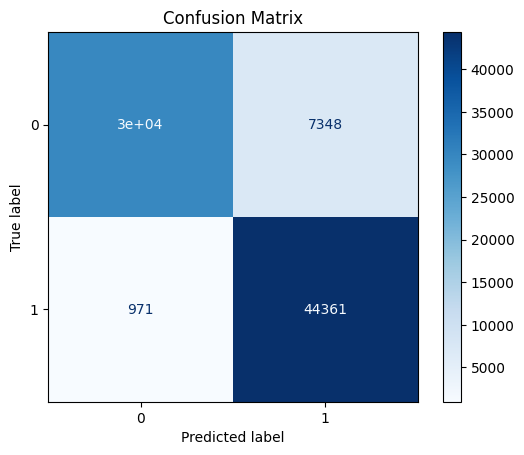

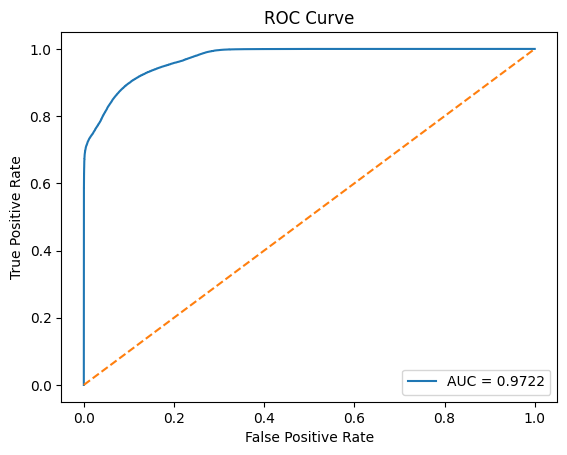

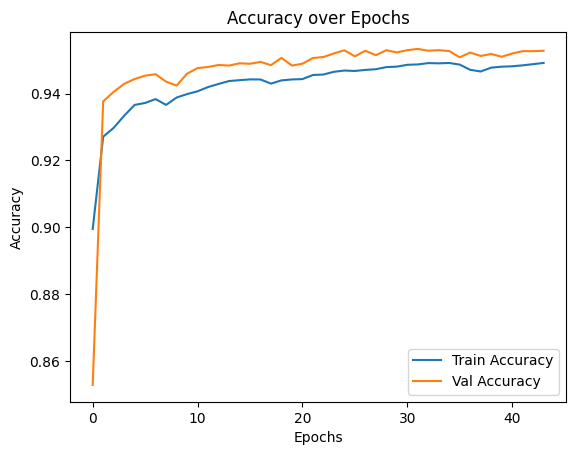

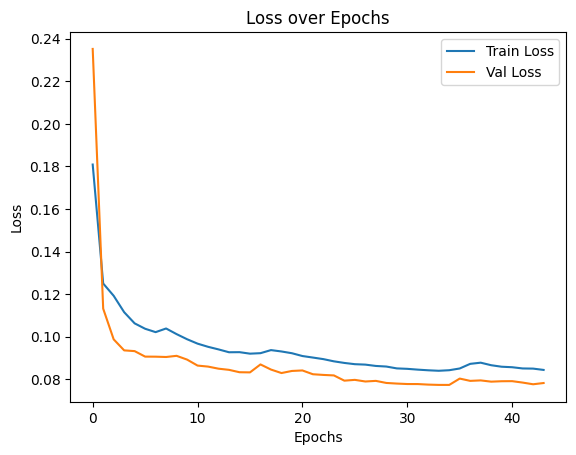

In [ ]:
# === Updated Full Code with Weighted Voting & Metric Visualization ===

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input, Conv1D,
                                     MaxPooling1D, Flatten, Add, Layer, Multiply)
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import matplotlib.pyplot as plt

# === Custom Layers ===
class Attention(Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.dense = Dense(units, activation='tanh')
        self.score = Dense(1, activation='sigmoid')

    def call(self, inputs):
        scores = self.score(self.dense(inputs))
        return Multiply()([inputs, scores])

def combined_loss(alpha=0.3):
    mse = tf.keras.losses.MeanSquaredError()
    ce = tf.keras.losses.CategoricalCrossentropy()
    def loss_fn(y_true, y_pred):
        return alpha * mse(y_true, y_pred) + (1 - alpha) * ce(y_true, y_pred)
    return loss_fn

def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)
    x = Add()([shortcut, x])
    x = tf.keras.activations.relu(x)
    return x

def build_model(input_shape, num_classes):
    inp = Input(shape=input_shape)
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    cnn_features = Dense(64, activation='relu')(x)
    attention_output = Attention(64)(cnn_features)
    x = residual_block(attention_output, 64)
    x = residual_block(x, 64)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='sigmoid', dtype='float32')(x)
    model = Model(inputs=inp, outputs=out)
    return model

# === Load and preprocess data ===
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv')

train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]])
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# === Train CNN model ===
tf.keras.backend.clear_session()
model = build_model((X_train.shape[1], 1), num_classes)
loss_fn = combined_loss(alpha=0.3)
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(0.001, first_decay_steps=500)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)]
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
                    validation_split=0.1, callbacks=callbacks, verbose=2)

# === Train XGBoost ===
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
xgb_model.fit(X_train, y_train_bal)

# === Ensemble Inference (Weighted Voting) ===
preds_nn = model.predict(X_test_cnn, verbose=0)
preds_xgb = xgb_model.predict_proba(X_test)
final_preds = 0.7 * preds_nn + 0.3 * preds_xgb
final_class = np.argmax(final_preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Weighted Voting Ensemble):")
print(classification_report(true_class, final_class))

# === Metrics ===
acc = accuracy_score(true_class, final_class)
precision = precision_score(true_class, final_class, average='weighted')
recall = recall_score(true_class, final_class, average='weighted')
f1 = f1_score(true_class, final_class, average='weighted')
fpr, tpr, _ = roc_curve(y_test.ravel(), final_preds.ravel())
roc_auc = auc(fpr, tpr)

print(f"\nAccuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {roc_auc:.4f}")

# === Confusion Matrix ===
plt.figure()
ConfusionMatrixDisplay(confusion_matrix(true_class, final_class)).plot(cmap='Blues')
plt.title("Confusion Matrix")

# === ROC Curve ===
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# === Metric Curves over Epochs ===
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.figure()
if 'loss' in history.history:
    plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# Load datasets
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv')

# Drop unused columns
train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

# Label encode categorical features
categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]])
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Split features and labels
X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)

# Feature selection using Mutual Information
selector = SelectKBest(mutual_info_classif, k=30)
X_train_sel = selector.fit_transform(X_train_bal, y_train_bal)
X_test_sel = selector.transform(X_test_raw)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

# Convert labels to categorical
num_classes = len(np.unique(y_train_bal))
y_train_cat = tf.keras.utils.to_categorical(y_train_bal, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test_raw, num_classes)

# Build MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_cat,
                    validation_split=0.1,
                    epochs=100,
                    batch_size=512,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)],
                    verbose=2)

# Evaluate
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print("Accuracy:", round(accuracy_score(y_test_raw, y_pred), 4))
print("Precision:", round(precision_score(y_test_raw, y_pred, average='macro'), 4))
print("Recall:", round(recall_score(y_test_raw, y_pred, average='macro'), 4))
print("F1 Score:", round(f1_score(y_test_raw, y_pred, average='macro'), 4))
print("AUC:", round(roc_auc_score(y_test_cat, y_pred_prob, multi_class='ovr'), 4))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
420/420 - 6s - 14ms/step - accuracy: 0.8965 - loss: 0.2446 - val_accuracy: 0.9176 - val_loss: 0.1650
Epoch 2/100
420/420 - 5s - 13ms/step - accuracy: 0.9193 - loss: 0.1705 - val_accuracy: 0.9280 - val_loss: 0.1548
Epoch 3/100
420/420 - 3s - 7ms/step - accuracy: 0.9243 - loss: 0.1569 - val_accuracy: 0.9460 - val_loss: 0.1342
Epoch 4/100
420/420 - 3s - 7ms/step - accuracy: 0.9270 - loss: 0.1499 - val_accuracy: 0.9405 - val_loss: 0.1325
Epoch 5/100
420/420 - 3s - 7ms/step - accuracy: 0.9287 - loss: 0.1451 - val_accuracy: 0.9475 - val_loss: 0.1252
Epoch 6/100
420/420 - 4s - 10ms/step - accuracy: 0.9310 - loss: 0.1418 - val_accuracy: 0.9560 - val_loss: 0.1133
Epoch 7/100
420/420 - 4s - 9ms/step - accuracy: 0.9325 - loss: 0.1379 - val_accuracy: 0.9362 - val_loss: 0.1285
Epoch 8/100
420/420 - 3s - 7ms/step - accuracy: 0.9334 - loss: 0.1361 - val_accuracy: 0.9573 - val_loss: 0.1074
Epoch 9/100
420/420 - 3s - 8ms/step - accuracy: 0.9344 - loss: 0.1347 - val_accuracy: 0.9364 - val_lo

Epoch 1/100
210/210 - 32s - 153ms/step - accuracy: 0.8947 - loss: 0.1878 - val_accuracy: 0.8957 - val_loss: 0.2614
Epoch 2/100
210/210 - 21s - 101ms/step - accuracy: 0.9220 - loss: 0.1319 - val_accuracy: 0.9338 - val_loss: 0.1234
Epoch 3/100
210/210 - 40s - 191ms/step - accuracy: 0.9231 - loss: 0.1286 - val_accuracy: 0.9338 - val_loss: 0.1070
Epoch 4/100
210/210 - 23s - 107ms/step - accuracy: 0.9276 - loss: 0.1198 - val_accuracy: 0.9379 - val_loss: 0.1023
Epoch 5/100
210/210 - 39s - 184ms/step - accuracy: 0.9305 - loss: 0.1156 - val_accuracy: 0.9388 - val_loss: 0.1014
Epoch 6/100
210/210 - 23s - 111ms/step - accuracy: 0.9328 - loss: 0.1121 - val_accuracy: 0.9415 - val_loss: 0.0977
Epoch 7/100
210/210 - 41s - 194ms/step - accuracy: 0.9328 - loss: 0.1106 - val_accuracy: 0.9419 - val_loss: 0.0974
Epoch 8/100
210/210 - 22s - 104ms/step - accuracy: 0.9314 - loss: 0.1133 - val_accuracy: 0.9407 - val_loss: 0.1007
Epoch 9/100
210/210 - 40s - 193ms/step - accuracy: 0.9344 - loss: 0.1099 - val_a

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:57:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report (Weighted Voting Ensemble):
              precision    recall  f1-score   support

           0       0.96      0.80      0.88     37000
           1       0.86      0.98      0.91     45332

    accuracy                           0.90     82332
   macro avg       0.91      0.89      0.89     82332
weighted avg       0.91      0.90      0.90     82332


Accuracy:  0.8974
Precision: 0.9056
Recall:    0.8974
F1 Score:  0.8959
AUC:       0.9715


<Figure size 640x480 with 0 Axes>

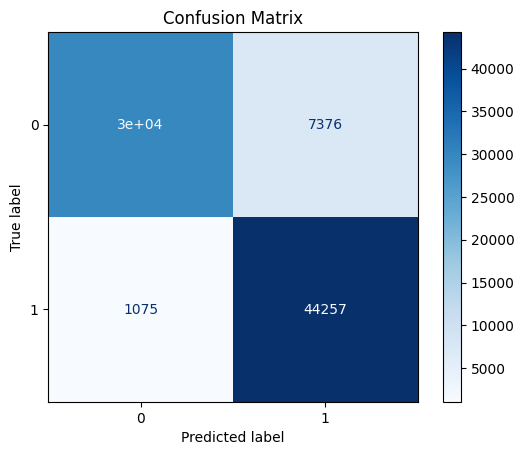

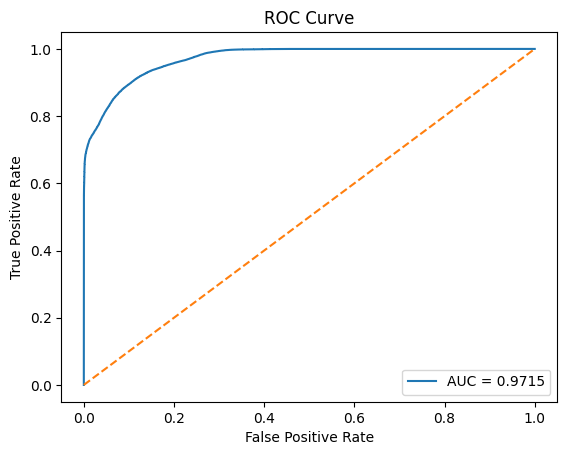

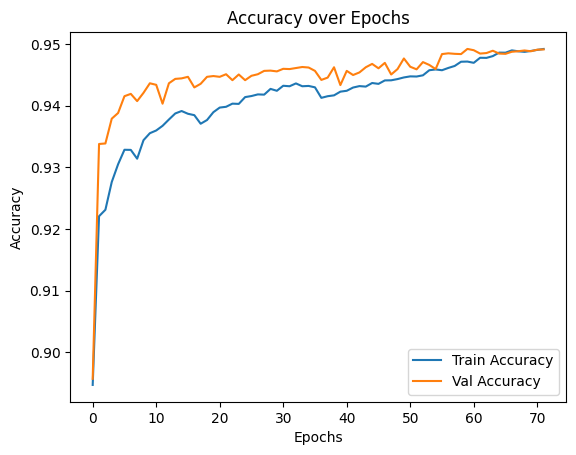

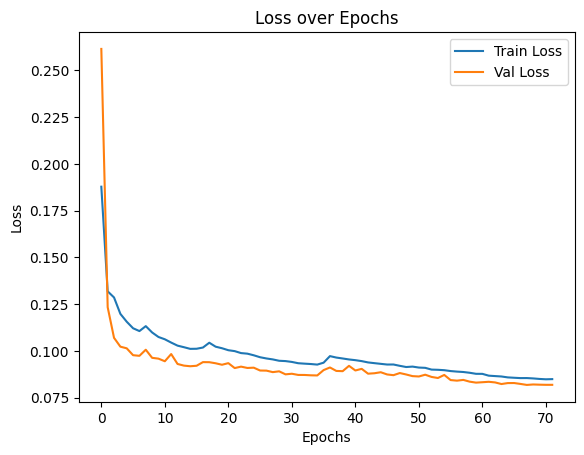

In [ ]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input, Conv1D,
                                     MaxPooling1D, Flatten, Add, Layer, Multiply, Reshape)
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import matplotlib.pyplot as plt

# === Custom Layers ===
class Attention(Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.dense = Dense(units, activation='tanh')
        self.score = Dense(1, activation='sigmoid')

    def call(self, inputs):
        scores = self.score(self.dense(inputs))
        return Multiply()([inputs, scores])

def combined_loss(alpha=0.3):
    mse = tf.keras.losses.MeanSquaredError()
    ce = tf.keras.losses.CategoricalCrossentropy()
    def loss_fn(y_true, y_pred):
        return alpha * mse(y_true, y_pred) + (1 - alpha) * ce(y_true, y_pred)
    return loss_fn

def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)
    x = Add()([shortcut, x])
    x = tf.keras.activations.relu(x)
    return x

def build_model(input_shape, num_classes):
    inp = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    cnn_features = Dense(128, activation='relu')(x)
    attention_output = Attention(128)(cnn_features)
    x = residual_block(attention_output, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='sigmoid', dtype='float32')(x)
    model = Model(inputs=inp, outputs=out)
    return model

# === Load and preprocess data ===
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

# === Encode categorical columns ===
categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]])
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# === Feature selection (Top 30 MI features) ===
X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values
feature_names = train_df.drop(columns=['label']).columns
mi_scores = mutual_info_classif(X_train_raw, y_train_raw, discrete_features='auto', random_state=42)
mi_ranking = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)
top_features = mi_ranking.head(30).index.tolist()
X_train_raw = train_df[top_features].values
X_test_raw = test_df[top_features].values

# === Apply SMOTE and shuffle ===
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# === Scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# === One-hot encode labels ===
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

# === Reshape for CNN ===
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# === Train CNN model ===
tf.keras.backend.clear_session()
model = build_model((X_train.shape[1], 1), num_classes)
loss_fn = combined_loss(alpha=0.3)
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(0.001, first_decay_steps=500)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)]
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
                    validation_split=0.1, callbacks=callbacks, verbose=2)

# === Train XGBoost ===
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
xgb_model.fit(X_train, y_train_bal)

# === Ensemble Inference ===
preds_nn = model.predict(X_test_cnn, verbose=0)
preds_xgb = xgb_model.predict_proba(X_test)
final_preds = 0.7 * preds_nn + 0.3 * preds_xgb
final_class = np.argmax(final_preds, axis=1)
true_class = np.argmax(y_test, axis=1)

# === Evaluation ===
print("\nClassification Report (Weighted Voting Ensemble):")
print(classification_report(true_class, final_class))
acc = accuracy_score(true_class, final_class)
precision = precision_score(true_class, final_class, average='weighted')
recall = recall_score(true_class, final_class, average='weighted')
f1 = f1_score(true_class, final_class, average='weighted')
fpr, tpr, _ = roc_curve(y_test.ravel(), final_preds.ravel())
roc_auc = auc(fpr, tpr)

print(f"\nAccuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {roc_auc:.4f}")

# === Plotting ===
plt.figure()
ConfusionMatrixDisplay(confusion_matrix(true_class, final_class)).plot(cmap='Blues')
plt.title("Confusion Matrix")

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.show()


Best + XGBoost for feature selection



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:52:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Top 30 selected features using XGBoost:
 ['sttl', 'ct_srv_dst', 'swin', 'state', 'ct_dst_sport_ltm', 'smean', 'sbytes', 'sloss', 'proto', 'dpkts', 'dmean', 'trans_depth', 'ct_state_ttl', 'synack', 'dbytes', 'service', 'ct_dst_src_ltm', 'ct_srv_src', 'sinpkt', 'dloss', 'dttl', 'ct_flw_http_mthd', 'spkts', 'tcprtt', 'ct_src_dport_ltm', 'dur', 'ct_dst_ltm', 'response_body_len', 'ct_src_ltm', 'sload']
Epoch 1/100
210/210 - 15s - 71ms/step - accuracy: 0.8938 - loss: 0.2006 - val_accuracy: 0.8271 - val_loss: 0.3012
Epoch 2/100
210/210 - 8s - 40ms/step - accuracy: 0.9208 - loss: 0.1343 - val_accuracy: 0.9255 - val_loss: 0.1217
Epoch 3/100
210/210 - 7s - 36ms/step - accuracy: 0.9238 - loss: 0.1276 - val_accuracy: 0.9374 - val_loss: 0.1029
Epoch 4/100
210/210 - 11s - 52ms/step - accuracy: 0.9290 - loss: 0.1174 - val_accuracy: 0.9384 - val_loss: 0.1003
Epoch 5/100
210/210 - 9s - 41ms/step - accuracy: 0.9321 - loss: 0.1122 - val_accuracy: 0.9411 - val_loss: 0.0976
Epoch 6/100
210/210 - 8s - 36ms/

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:05:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report (Weighted Voting Ensemble):
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     37000
           1       0.87      0.97      0.91     45332

    accuracy                           0.90     82332
   macro avg       0.91      0.89      0.90     82332
weighted avg       0.91      0.90      0.90     82332


Accuracy:  0.8997
Precision: 0.9057
Recall:    0.8997
F1 Score:  0.8986
AUC:       0.9729


<Figure size 640x480 with 0 Axes>

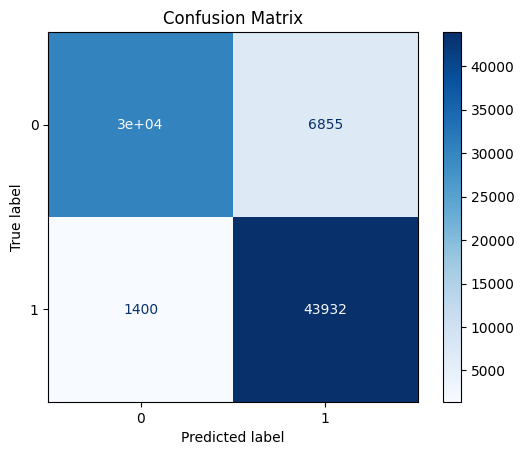

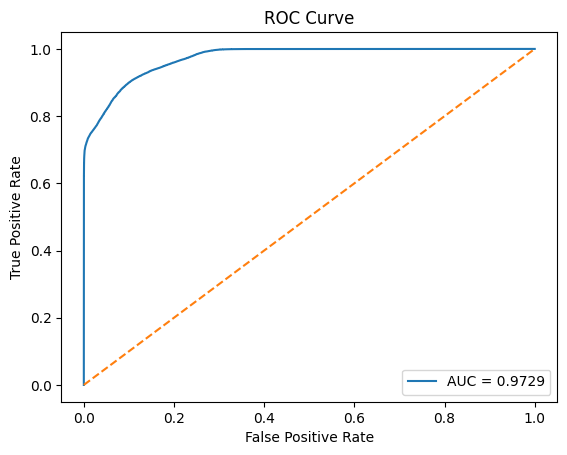

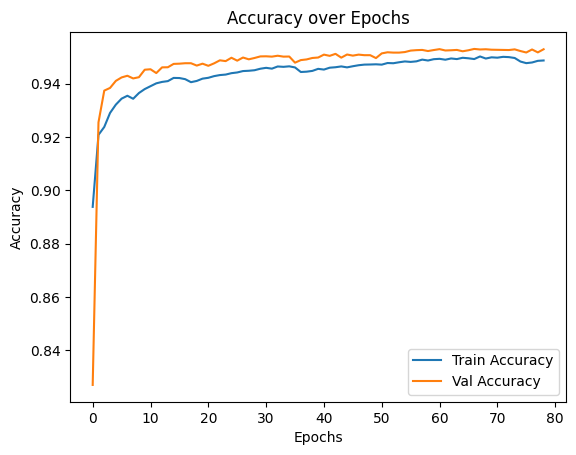

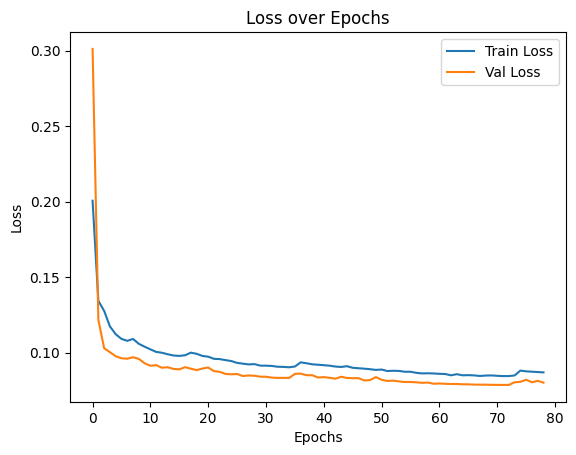

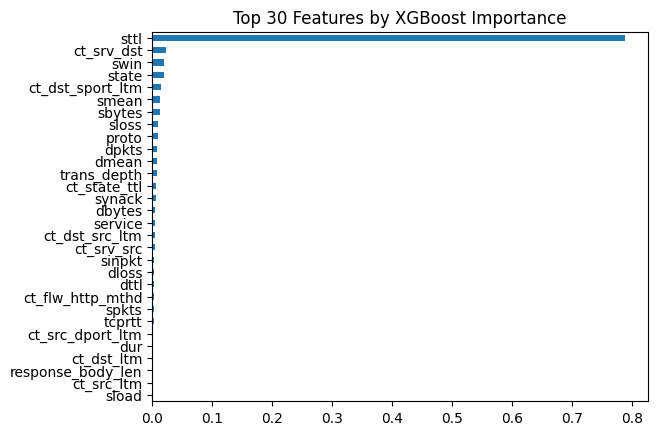

In [ ]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input, Conv1D,
                                     MaxPooling1D, Flatten, Add, Layer, Multiply)
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import matplotlib.pyplot as plt

# === Custom Layers ===
class Attention(Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.dense = Dense(units, activation='tanh')
        self.score = Dense(1, activation='sigmoid')

    def call(self, inputs):
        scores = self.score(self.dense(inputs))
        return Multiply()([inputs, scores])

def combined_loss(alpha=0.3):
    mse = tf.keras.losses.MeanSquaredError()
    ce = tf.keras.losses.CategoricalCrossentropy()
    def loss_fn(y_true, y_pred):
        return alpha * mse(y_true, y_pred) + (1 - alpha) * ce(y_true, y_pred)
    return loss_fn

def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)
    x = Add()([shortcut, x])
    x = tf.keras.activations.relu(x)
    return x

def build_model(input_shape, num_classes):
    inp = Input(shape=input_shape)
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    cnn_features = Dense(64, activation='relu')(x)
    attention_output = Attention(64)(cnn_features)
    x = residual_block(attention_output, 64)
    x = residual_block(x, 64)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='sigmoid', dtype='float32')(x)
    model = Model(inputs=inp, outputs=out)
    return model

# === Load and preprocess data ===
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

# === Encode categorical columns ===
categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]])
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# === Prepare raw features and labels ===
X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

'''# === Feature Selection using Mutual Information ===
feature_names = train_df.drop(columns=['label']).columns
mi_scores = mutual_info_classif(X_train_raw, y_train_raw, discrete_features='auto', random_state=42)
mi_ranking = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)
top_features = mi_ranking.head(30).index.tolist()
print("Top 30 selected features:\n", top_features)'''
from xgboost import XGBClassifier

# Train an XGBoost model on the raw training data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_raw, y_train_raw)

# Get feature importances
feature_importances = xgb_model.feature_importances_
feature_names = train_df.drop(columns=['label']).columns

# Rank features by importance
importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)
top_features = importance_series.head(30).index.tolist()

print("Top 30 selected features using XGBoost:\n", top_features)


# === Reduce data to selected features ===
X_train_raw = train_df[top_features].values
X_test_raw = test_df[top_features].values

# === Apply SMOTE and shuffle ===
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# === Scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# === One-hot encode labels ===
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

# === Reshape for CNN ===
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# === Train CNN model ===
tf.keras.backend.clear_session()
model = build_model((X_train.shape[1], 1), num_classes)
loss_fn = combined_loss(alpha=0.3)
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(0.001, first_decay_steps=500)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)]
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
                    validation_split=0.1, callbacks=callbacks, verbose=2)

# === Train XGBoost ===
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
xgb_model.fit(X_train, y_train_bal)

# === Ensemble Inference (Weighted Voting) ===
preds_nn = model.predict(X_test_cnn, verbose=0)
preds_xgb = xgb_model.predict_proba(X_test)
final_preds = 0.7 * preds_nn + 0.3 * preds_xgb
final_class = np.argmax(final_preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Weighted Voting Ensemble):")
print(classification_report(true_class, final_class))

# === Metrics ===
acc = accuracy_score(true_class, final_class)
precision = precision_score(true_class, final_class, average='weighted')
recall = recall_score(true_class, final_class, average='weighted')
f1 = f1_score(true_class, final_class, average='weighted')
fpr, tpr, _ = roc_curve(y_test.ravel(), final_preds.ravel())
roc_auc = auc(fpr, tpr)

print(f"\nAccuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {roc_auc:.4f}")

# === Confusion Matrix ===
plt.figure()
ConfusionMatrixDisplay(confusion_matrix(true_class, final_class)).plot(cmap='Blues')
plt.title("Confusion Matrix")

# === ROC Curve ===
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# === Accuracy over Epochs ===
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# === Loss over Epochs ===
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.show()

importance_series.head(30).plot(kind='barh')
plt.title("Top 30 Features by XGBoost Importance")
plt.gca().invert_yaxis()
plt.show()



Top 30 selected features:
 ['sbytes', 'sttl', 'dbytes', 'ct_state_ttl', 'dttl', 'rate', 'sload', 'dur', 'smean', 'dmean', 'dinpkt', 'dload', 'dpkts', 'sinpkt', 'tcprtt', 'synack', 'ackdat', 'sjit', 'state', 'djit', 'spkts', 'dloss', 'ct_dst_sport_ltm', 'proto', 'sloss', 'ct_dst_ltm', 'ct_srv_dst', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_src_dport_ltm']
Epoch 1/100
210/210 - 16s - 76ms/step - accuracy: 0.8955 - loss: 0.1863 - val_accuracy: 0.9125 - val_loss: 0.2144
Epoch 2/100
210/210 - 9s - 44ms/step - accuracy: 0.9210 - loss: 0.1319 - val_accuracy: 0.9293 - val_loss: 0.1258
Epoch 3/100
210/210 - 9s - 42ms/step - accuracy: 0.9240 - loss: 0.1261 - val_accuracy: 0.9376 - val_loss: 0.1051
Epoch 4/100
210/210 - 9s - 42ms/step - accuracy: 0.9284 - loss: 0.1185 - val_accuracy: 0.9396 - val_loss: 0.1030
Epoch 5/100
210/210 - 8s - 40ms/step - accuracy: 0.9306 - loss: 0.1143 - val_accuracy: 0.9414 - val_loss: 0.0993
Epoch 6/100
210/210 - 9s - 41ms/step - accuracy: 0.9325 - loss: 0.1116 - val_accura

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:22:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report (Weighted Voting Ensemble):
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     37000
           1       0.86      0.98      0.92     45332

    accuracy                           0.90     82332
   macro avg       0.92      0.89      0.90     82332
weighted avg       0.91      0.90      0.90     82332


Accuracy:  0.9018
Precision: 0.9100
Recall:    0.9018
F1 Score:  0.9005
AUC:       0.9735


AttributeError: 'list' object has no attribute 'plot'

<Figure size 640x480 with 0 Axes>

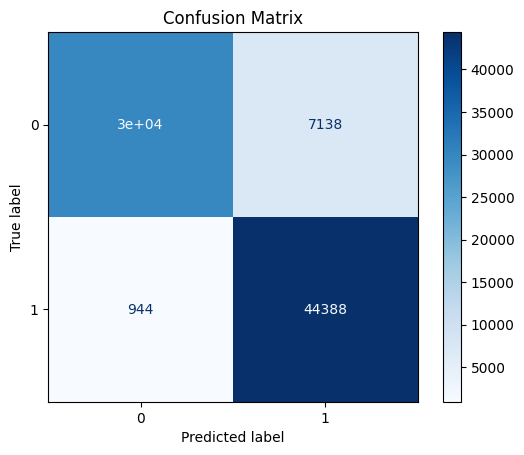

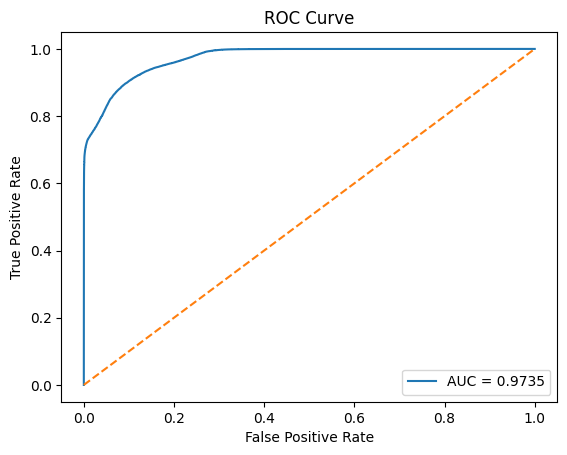

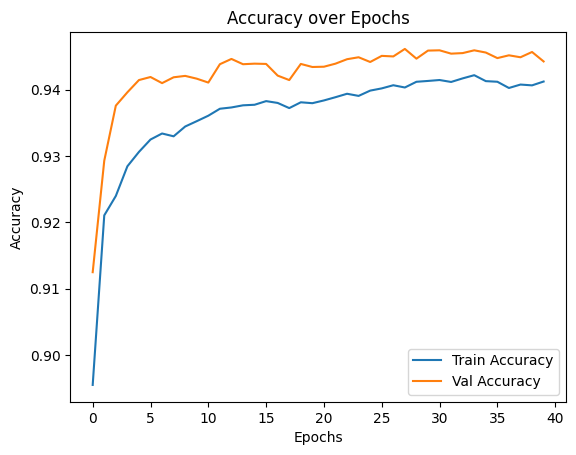

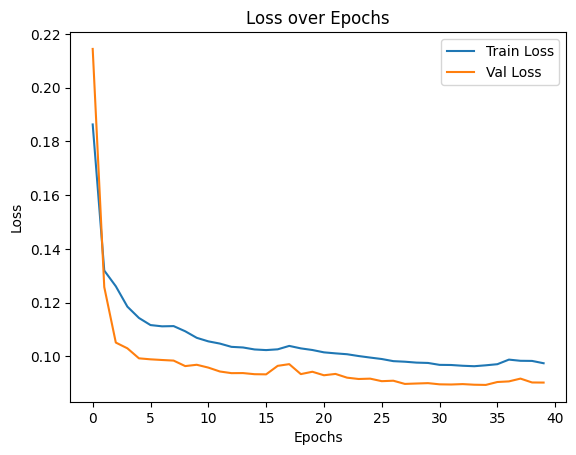

<Figure size 1000x800 with 0 Axes>

In [ ]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input, Conv1D,
                                     MaxPooling1D, Flatten, Add, Layer, Multiply)
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import matplotlib.pyplot as plt

# === Custom Layers ===
class Attention(Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.dense = Dense(units, activation='tanh')
        self.score = Dense(1, activation='sigmoid')

    def call(self, inputs):
        scores = self.score(self.dense(inputs))
        return Multiply()([inputs, scores])

def combined_loss(alpha=0.3):
    mse = tf.keras.losses.MeanSquaredError()
    ce = tf.keras.losses.CategoricalCrossentropy()
    def loss_fn(y_true, y_pred):
        return alpha * mse(y_true, y_pred) + (1 - alpha) * ce(y_true, y_pred)
    return loss_fn

def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)
    x = Add()([shortcut, x])
    x = tf.keras.activations.relu(x)
    return x

def build_model(input_shape, num_classes):
    inp = Input(shape=input_shape)
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    cnn_features = Dense(64, activation='relu')(x)
    attention_output = Attention(64)(cnn_features)
    x = residual_block(attention_output, 64)
    x = residual_block(x, 64)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='sigmoid', dtype='float32')(x)
    model = Model(inputs=inp, outputs=out)
    return model

# === Load and preprocess data ===
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
train_df = train_df.drop(columns=['id', 'attack_cat'])
test_df = test_df.drop(columns=['id', 'attack_cat'])

# === Encode categorical columns ===
categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]])
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# === Prepare raw features and labels ===
X_train_raw = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# === Feature Selection using Mutual Information ===
feature_names = train_df.drop(columns=['label']).columns
mi_scores = mutual_info_classif(X_train_raw, y_train_raw, discrete_features='auto', random_state=42)
mi_ranking = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)
top_features = mi_ranking.head(30).index.tolist()
print("Top 30 selected features:\n", top_features)

# === Reduce data to selected features ===
X_train_raw = train_df[top_features].values
X_test_raw = test_df[top_features].values

# === Apply SMOTE and shuffle ===
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=42)

# === Scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test_raw)

# === One-hot encode labels ===
y_train = to_categorical(y_train_bal)
y_test = to_categorical(y_test_raw)
num_classes = y_train.shape[1]

# === Reshape for CNN ===
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# === Train CNN model ===
tf.keras.backend.clear_session()
model = build_model((X_train.shape[1], 1), num_classes)
loss_fn = combined_loss(alpha=0.3)
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(0.001, first_decay_steps=500)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)]
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
                    validation_split=0.1, callbacks=callbacks, verbose=2)

# === Train XGBoost ===
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
xgb_model.fit(X_train, y_train_bal)

# === Ensemble Inference (Weighted Voting) ===
preds_nn = model.predict(X_test_cnn, verbose=0)
preds_xgb = xgb_model.predict_proba(X_test)
final_preds = 0.7 * preds_nn + 0.3 * preds_xgb
final_class = np.argmax(final_preds, axis=1)
true_class = np.argmax(y_test, axis=1)

print("\nClassification Report (Weighted Voting Ensemble):")
print(classification_report(true_class, final_class))

# === Metrics ===
acc = accuracy_score(true_class, final_class)
precision = precision_score(true_class, final_class, average='weighted')
recall = recall_score(true_class, final_class, average='weighted')
f1 = f1_score(true_class, final_class, average='weighted')
fpr, tpr, _ = roc_curve(y_test.ravel(), final_preds.ravel())
roc_auc = auc(fpr, tpr)

print(f"\nAccuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {roc_auc:.4f}")

# === Confusion Matrix ===
plt.figure()
ConfusionMatrixDisplay(confusion_matrix(true_class, final_class)).plot(cmap='Blues')
plt.title("Confusion Matrix")

# === ROC Curve ===
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# === Accuracy over Epochs ===
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# === Loss over Epochs ===
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.title("Top 30 Features by Mutual Information")
plt.xlabel("Mutual Information Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




In [ ]:
# === Imports ===
import os
import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import (classification_report, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay)
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input,
                                     Conv1D, MaxPooling1D, Flatten, Add, Layer, Multiply)
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import matplotlib.pyplot as plt

# === Reproducibility (optional) ===
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# === Custom Feature-wise Attention Layer ===
class FeatureAttention(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.dense_tanh = None
        self.score = None

    def build(self, input_shape):
        # input_shape: (batch, F)
        F = input_shape[-1]
        # map to F features then score per feature
        self.dense_tanh = Dense(F, activation='tanh')
        self.score = Dense(F, activation='softmax')  # per-feature softmax
        super().build(input_shape)

    def call(self, x):
        # x: (batch, F)
        h = self.dense_tanh(x)     # (batch, F)
        w = self.score(h)          # (batch, F) sums to 1 per-sample
        return x * w               # (batch, F)

# === Residual block (keeps or projects dims) ===
def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)
    x = Add()([shortcut, x])
    x = tf.keras.activations.relu(x)
    return x

# === Build model function ===
def build_model(input_shape, num_classes, dropout_rate=0.3):
    inp = Input(shape=input_shape)                  # (F, 1)
    x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Flatten()(x)                                # -> (batch, features_flat)
    x = Dense(64, activation='relu')(x)             # reduce dim -> (batch, 64)
    x = BatchNormalization()(x)

    # Feature-wise attention (expects shape (batch, F))
    x = FeatureAttention()(x)                       # (batch, 64)

    # Residual MLP blocks
    x = residual_block(x, 64, dropout_rate)
    x = residual_block(x, 64, dropout_rate)

    # Final compact head (penultimate smaller)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)

    out = Dense(num_classes, activation='softmax', dtype='float32')(x)
    model = Model(inputs=inp, outputs=out)
    return model

# ============================
# === Load & Preprocess Data ==
# ============================
train_df = pd.read_csv('/content/UNSW_NB15_training-set.csv', sep=',')
test_df  = pd.read_csv('/content/UNSW_NB15_testing-set.csv', sep=',')

# Drop columns
drop_cols = ['id', 'attack_cat']
for c in drop_cols:
    if c in train_df.columns: train_df = train_df.drop(columns=[c])
    if c in test_df.columns:  test_df  = test_df.drop(columns=[c])

# Categorical columns (same as before)
categorical_cols = ['proto', 'service', 'state']

# Fit LabelEncoders on combined values (train+test) and save them
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined.astype(str))              # cast to str for safety
    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col]  = le.transform(test_df[col].astype(str))
    encoders[col] = le

# Prepare raw features and labels
feature_names_all = train_df.drop(columns=['label']).columns.tolist()
X_train_raw_full = train_df.drop(columns=['label']).values
y_train_raw = train_df['label'].values
X_test_raw_full = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

# ============================
# === Feature selection (Mutual Information) ===
# ============================
mi_scores = mutual_info_classif(X_train_raw_full, y_train_raw, discrete_features='auto', random_state=SEED)
mi_ranking = pd.Series(mi_scores, index=feature_names_all).sort_values(ascending=False)
top_k = 30
top_features = mi_ranking.head(top_k).index.tolist()
print("Top features (selected):", top_features)

# Reduce data to selected features
X_train_raw = train_df[top_features].values
X_test_raw  = test_df[top_features].values

# Find categorical feature indices within selected features for SMOTENC
cat_indices = [i for i, f in enumerate(top_features) if f in categorical_cols]
print("Categorical feature indices (in selected features):", cat_indices)

# ============================
# === SMOTENC (categorical-aware) ===
# ============================
sm = SMOTENC(categorical_features=cat_indices, random_state=SEED)
X_train_bal, y_train_bal = sm.fit_resample(X_train_raw, y_train_raw)
X_train_bal, y_train_bal = shuffle(X_train_bal, y_train_bal, random_state=SEED)

# ============================
# === Scaling ===
# ============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bal)
X_test  = scaler.transform(X_test_raw)

# One-hot encode labels (multi-class)
y_train = to_categorical(y_train_bal)
y_test  = to_categorical(y_test_raw)
num_classes = y_train.shape[1]
print("num_classes:", num_classes)

# Reshape for Conv1D: (n, features, 1)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ============================
# === Build, compile & train Keras model ===
# ============================
tf.keras.backend.clear_session()
model = build_model((X_train.shape[1], 1), num_classes, dropout_rate=0.3)
model.summary()

# Loss and optimizer
loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05)
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=0.001, first_decay_steps=500, t_mul=2.0, m_mul=1.0, alpha=1e-6
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)
]

history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=1024,
                    validation_split=0.1, callbacks=callbacks, verbose=2)

# ============================
# === Train XGBoost (baseline tree model) ===
# ============================
# XGBoost expects integer labels
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=SEED)
xgb_model.fit(X_train, y_train_bal)

# ============================
# === Ensemble Inference ===
# ============================
preds_nn = model.predict(X_test_cnn, verbose=0)        # shape (n, num_classes)
preds_xgb = xgb_model.predict_proba(X_test)            # shape (n, num_classes)

# Weighted average ensemble (you can tune weights)
w_nn = 0.7
w_xgb = 0.3
final_preds = w_nn * preds_nn + w_xgb * preds_xgb
final_class = np.argmax(final_preds, axis=1)
true_class = np.argmax(y_test, axis=1)

# === Metrics ===
print("\nClassification Report (Ensemble):")
print(classification_report(true_class, final_class, digits=4))

acc = accuracy_score(true_class, final_class)
precision = precision_score(true_class, final_class, average='weighted', zero_division=0)
recall = recall_score(true_class, final_class, average='weighted', zero_division=0)
f1 = f1_score(true_class, final_class, average='weighted', zero_division=0)

# Proper multi-class AUC (macro OVR)
try:
    roc_auc = roc_auc_score(y_test, final_preds, multi_class='ovr', average='macro')
except Exception as e:
    print("roc_auc_score error:", e)
    roc_auc = None

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
if roc_auc is not None:
    print(f"AUC (macro OVR): {roc_auc:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(true_class, final_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Ensemble)")
plt.show()

# === ROC Curves per class (optional) ===
if num_classes > 2:
    plt.figure(figsize=(7,6))
    # Plot ROC curves for each class
    for i in range(num_classes):
        fpr_i, tpr_i, _ = roc_curve(y_test[:, i], final_preds[:, i])
        plt.plot(fpr_i, tpr_i, label=f'Class {i} (AUC = {auc(fpr_i, tpr_i):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves (Multi-class)')
    plt.legend()
    plt.grid(True)
    plt.show()


# === Training curves ===
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('Loss')
plt.legend()
plt.show()

# ============================
# === Save artifacts ===
# ============================
out_dir = '/content/models'
os.makedirs(out_dir, exist_ok=True)

# Save Keras model (SavedModel format)
model_save_path = os.path.join(out_dir, 'hybrid_cnn_attention_mlp')
model.save(model_save_path, save_format='tf')
print("Saved Keras model to:", model_save_path)

# Save XGBoost model
xgb_model_path = os.path.join(out_dir, 'xgb_model.json')
xgb_model.save_model(xgb_model_path)
print("Saved XGBoost model to:", xgb_model_path)

# Save scaler, encoders, top_features
joblib.dump(scaler, os.path.join(out_dir, 'scaler.joblib'))
joblib.dump(top_features, os.path.join(out_dir, 'top_features.joblib'))
joblib.dump(cat_indices, os.path.join(out_dir, 'cat_indices.joblib'))
# Save label encoders dict
with open(os.path.join(out_dir, 'label_encoders.pkl'), 'wb') as f:
    pickle.dump(encoders, f)
print("Saved scaler, top_features, cat_indices, encoders to:", out_dir)

# Save ensemble metadata
meta = {
    'w_nn': w_nn,
    'w_xgb': w_xgb,
    'num_classes': num_classes
}
joblib.dump(meta, os.path.join(out_dir, 'ensemble_meta.joblib'))

print("All artifacts saved.")

Top features (selected): ['sbytes', 'sttl', 'dbytes', 'ct_state_ttl', 'dttl', 'rate', 'sload', 'dur', 'smean', 'dmean', 'dinpkt', 'dload', 'dpkts', 'sinpkt', 'tcprtt', 'synack', 'ackdat', 'sjit', 'state', 'djit', 'spkts', 'dloss', 'ct_dst_sport_ltm', 'proto', 'sloss', 'ct_dst_ltm', 'ct_srv_dst', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_src_dport_ltm']
Categorical feature indices (in selected features): [18, 23]
num_classes: 2


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 30, 32)    │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 15, 32)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 15, 32)    │        128 │ max_pooling1d[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 15, 32)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 480)       │          0 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     30,784 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_attention   │ (None, 64)        │      8,320 │ batch_normalizat… │
│ (FeatureAttention)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      4,160 │ feature_attentio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64)        │          0 │ feature_attentio… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 64)        │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      4,160 │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_5[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      4,160 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 59,554 (232.63 KB)

 Trainable params: 58,786 (229.63 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/100
210/210 - 18s - 84ms/step - accuracy: 0.8829 - loss: 0.3338 - val_accuracy: 0.7097 - val_loss: 0.5808 - learning_rate: 6.2435e-04
Epoch 2/100
210/210 - 20s - 95ms/step - accuracy: 0.9177 - loss: 0.2603 - val_accuracy: 0.9087 - val_loss: 0.3182 - learning_rate: 6.1848e-05
Epoch 3/100
210/210 - 10s - 49ms/step - accuracy: 0.9209 - loss: 0.2535 - val_accuracy: 0.9355 - val_loss: 0.2284 - learning_rate: 9.5888e-04
Epoch 4/100
210/210 - 10s - 49ms/step - accuracy: 0.9256 - loss: 0.2437 - val_accuracy: 0.9372 - val_loss: 0.2233 - learning_rate: 7.4088e-04
Epoch 5/100
210/210 - 19s - 92ms/step - accuracy: 0.9288 - loss: 0.2384 - val_accuracy: 0.9385 - val_loss: 0.2198 - learning_rate: 4.2178e-04
Epoch 6/100
210/210 - 10s - 49ms/step - accuracy: 0.9308 - loss: 0.2351 - val_accuracy: 0.9397 - val_loss: 0.2185 - learning_rate: 1.3552e-04
Epoch 7/100
210/210 - 10s - 49ms/step - accuracy: 0.9310 - loss: 0.2341 - val_accuracy: 0.9392 - val_loss: 0.2187 - learning_rate: 2.2200e-06
Epoch 

TypeError: This optimizer was created with a `LearningRateSchedule` object as its `learning_rate` constructor argument, hence its learning rate is not settable. If you need the learning rate to be settable, you should instantiate the optimizer with a float `learning_rate` argument.